In [4]:
import psycopg2

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import geoip2.database




File_path_Feb7= r"/Users/sa8/Desktop/The-CyberChase/CyberCrimeData/2023-02-07.csv" 
File_path_Feb8 = r"/Users/sa8/Desktop/The-CyberChase/CyberCrimeData/2023-02-08.csv" 

Feb7 = pd.read_csv(File_path_Feb7)
Feb8 = pd.read_csv(File_path_Feb8)

Feb7['Date'] = '02-07-2023'
Feb8['Date'] = '02-08-2023'



combined_df = pd.concat([Feb7, Feb8], ignore_index=True)


#  * 📊 **Note on Log Scales**  
# To account for extreme imbalances and skewed distributions in the data (e.g., large variations in honeypot activity counts, TCP flag frequencies, and flow durations), many of the plots in this analysis use a **logarithmic scale on the y-axis**. This improves readability and highlights smaller patterns that might otherwise be overshadowed by outliers. Always check axis labels when interpreting results.


---

In [5]:
combined_df.shape

(761637, 85)

In [6]:
combined_df.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [7]:
combined_df.dtypes

Flow ID      object
Src IP       object
Src Port      int64
Dst IP       object
Dst Port      int64
             ...   
Idle Std    float64
Idle Max    float64
Idle Min    float64
Label        object
Date         object
Length: 85, dtype: object

In [8]:
combined_df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Date
0,95.162.215.209-10.1.0.4-46175-123-17,95.162.215.209,46175,10.1.0.4,123,17,2023-02-07 00:00:00,85888092,2,0,...,0.0,0.0,0.0,0.0,8.378640e+14,1.184919e+15,1.675728e+15,85888092.0,ddospot,02-07-2023
1,95.162.215.209-10.1.0.4-4416-123-17,95.162.215.209,4416,10.1.0.4,123,17,2023-02-07 00:00:00,59645550,3,0,...,0.0,0.0,0.0,0.0,5.585760e+14,9.674820e+14,1.675728e+15,10782311.0,ddospot,02-07-2023
2,95.162.223.26-10.1.0.4-37391-123-17,95.162.223.26,37391,10.1.0.4,123,17,2023-02-07 00:00:00,91683010,2,0,...,0.0,0.0,0.0,0.0,8.378640e+14,1.184919e+15,1.675728e+15,91683010.0,ddospot,02-07-2023
3,95.162.215.209-10.1.0.4-44485-123-17,95.162.215.209,44485,10.1.0.4,123,17,2023-02-07 00:00:00,17574939,2,0,...,0.0,0.0,0.0,0.0,8.378640e+14,1.184919e+15,1.675728e+15,17574939.0,ddospot,02-07-2023
4,95.162.223.26-10.1.0.4-4181-123-17,95.162.223.26,4181,10.1.0.4,123,17,2023-02-07 00:00:00,62381359,2,0,...,0.0,0.0,0.0,0.0,8.378640e+14,1.184919e+15,1.675728e+15,62381359.0,ddospot,02-07-2023


In [9]:
combined_df.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,761637.000000,761637.000000,761637.000000,7.616370e+05,761637.000000,761637.000000,761637.00000,7.616370e+05,761637.000000,761637.000000,...,761637.000000,761637.000000,7.616370e+05,7.616370e+05,7.616370e+05,7.616370e+05,7.616370e+05,7.616370e+05,7.616370e+05,7.616370e+05
mean,32786.388272,254.903096,16.839861,5.104532e+07,15.003990,0.329096,127.95710,3.021533e+02,11.989083,9.446480,...,13.970235,8.275675,5.481405e+04,1.037876e+04,6.374791e+04,4.701433e+04,9.480785e+14,9.963698e+14,1.675777e+15,2.499937e+14
std,18933.949774,2415.685771,1.317532,3.640811e+07,216.182477,115.169515,2276.21672,1.620891e+05,46.111913,12.506395,...,216.121755,2.377188,8.985695e+05,3.307278e+05,1.043947e+06,8.241774e+05,3.121369e+14,4.208052e+14,4.827031e+10,5.970317e+14
min,0.000000,19.000000,6.000000,0.000000e+00,1.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,...,0.000000,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.197018e+14,0.000000e+00,1.675728e+15,5.000160e+06
25%,16377.000000,123.000000,17.000000,1.833665e+07,2.000000,0.000000,16.00000,0.000000e+00,8.000000,8.000000,...,1.000000,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.378692e+14,1.184921e+15,1.675740e+15,3.018885e+07
50%,32909.000000,123.000000,17.000000,4.786644e+07,2.000000,0.000000,16.00000,0.000000e+00,8.000000,8.000000,...,1.000000,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.378789e+14,1.184931e+15,1.675757e+15,6.252568e+07
75%,49183.000000,123.000000,17.000000,8.175744e+07,2.000000,0.000000,16.00000,0.000000e+00,8.000000,8.000000,...,1.000000,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.379209e+14,1.184944e+15,1.675819e+15,1.019224e+08
max,65534.000000,65344.000000,17.000000,1.200000e+08,17633.000000,94880.000000,781215.00000,1.334838e+08,1460.000000,1448.000000,...,17632.000000,44.000000,9.228942e+07,4.756460e+07,9.228942e+07,9.228942e+07,1.675901e+15,1.185041e+15,1.675901e+15,1.675901e+15


In [10]:
combined_df.isnull().sum()

Flow ID     0
Src IP      0
Src Port    0
Dst IP      0
Dst Port    0
           ..
Idle Std    0
Idle Max    0
Idle Min    0
Label       0
Date        0
Length: 85, dtype: int64

In [11]:


# Load the GeoLite2 City database from MaxMind.
# This file maps IP addresses to city and country information.
reader = geoip2.database.Reader('/Users/sa8/Desktop/GeoLite2/GeoLite2-City.mmdb')

# Initialize an empty list to store the country (or location) for each IP.
locations = []

# Loop through each source IP address in the 'Src IP' column of the DataFrame `Feb7`.
for ip in combined_df['Src IP']:
    try:
        # Try to retrieve city-level geolocation data for the given IP.
        response = reader.city(ip)
        
        # Get the country name from the response. If it's not found, use "Unknown Country".
        country = response.country.name or "Unknown Country"

        # Get the city name (not used here, but shown for completeness). 
        # You could use: city = response.city.name or "Unknown City"
        city = response.city.name or "Unknown City"
        
        # Format the country name as a string. You could add city if needed.
        location_str = f"{country}"
    
    except Exception as e:
        # If the lookup fails (invalid IP, not in database, etc.), save the error message.
        location_str = f"Error: {e}"
    
    # Append the resulting location string (or error) to the locations list.
    locations.append(location_str)

# Add the list of locations as a new column called 'Location' in the DataFrame.
combined_df['Source Location'] = locations



# Initialize list to hold destination (target) locations
Destination_locations = []

# Loop through each destination IP address
for ip in combined_df['Dst IP']:
    try:
        response = reader.city(ip)
        country = response.country.name or "Unknown Country"
        city = response.city.name or "Unknown City"
        location_str = f"{country}"
    except Exception as e:
        location_str = f"Error: {e}"
    Destination_locations.append(location_str)

# Add to DataFrame with clear name indicating destination IP location
combined_df['Destination Location'] = Destination_locations






In [12]:
#Showing the newly added, Source Location,Destination location and date columns
combined_df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Date,Source Location,Destination Location
0,95.162.215.209-10.1.0.4-46175-123-17,95.162.215.209,46175,10.1.0.4,123,17,2023-02-07 00:00:00,85888092,2,0,...,0.0,0.0,8.378640e+14,1.184919e+15,1.675728e+15,8.588809e+07,ddospot,02-07-2023,Iran,Error: The address 10.1.0.4 is not in the data...
1,95.162.215.209-10.1.0.4-4416-123-17,95.162.215.209,4416,10.1.0.4,123,17,2023-02-07 00:00:00,59645550,3,0,...,0.0,0.0,5.585760e+14,9.674820e+14,1.675728e+15,1.078231e+07,ddospot,02-07-2023,Iran,Error: The address 10.1.0.4 is not in the data...
2,95.162.223.26-10.1.0.4-37391-123-17,95.162.223.26,37391,10.1.0.4,123,17,2023-02-07 00:00:00,91683010,2,0,...,0.0,0.0,8.378640e+14,1.184919e+15,1.675728e+15,9.168301e+07,ddospot,02-07-2023,Iran,Error: The address 10.1.0.4 is not in the data...
3,95.162.215.209-10.1.0.4-44485-123-17,95.162.215.209,44485,10.1.0.4,123,17,2023-02-07 00:00:00,17574939,2,0,...,0.0,0.0,8.378640e+14,1.184919e+15,1.675728e+15,1.757494e+07,ddospot,02-07-2023,Iran,Error: The address 10.1.0.4 is not in the data...
4,95.162.223.26-10.1.0.4-4181-123-17,95.162.223.26,4181,10.1.0.4,123,17,2023-02-07 00:00:00,62381359,2,0,...,0.0,0.0,8.378640e+14,1.184919e+15,1.675728e+15,6.238136e+07,ddospot,02-07-2023,Iran,Error: The address 10.1.0.4 is not in the data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761632,10.1.0.4-52.239.170.228-55664-443-6,10.1.0.4,55664,52.239.170.228,443,6,2023-02-08 23:58:10,532,2,0,...,0.0,0.0,1.675901e+15,0.000000e+00,1.675901e+15,1.675901e+15,log4pot,02-08-2023,Error: The address 10.1.0.4 is not in the data...,United States
761633,10.1.0.4-52.239.170.228-55664-443-6,10.1.0.4,55664,52.239.170.228,443,6,2023-02-08 23:58:10,95907,14,13,...,0.0,0.0,1.675901e+15,0.000000e+00,1.675901e+15,1.675901e+15,log4pot,02-08-2023,Error: The address 10.1.0.4 is not in the data...,United States
761634,210.117.122.129-10.1.0.4-36585-23-6,210.117.122.129,36585,10.1.0.4,23,6,2023-02-08 23:58:27,113718636,2,2,...,152.0,152.0,8.379504e+14,1.185041e+15,1.675901e+15,1.137183e+08,cowrie,02-08-2023,South Korea,Error: The address 10.1.0.4 is not in the data...
761635,122.195.195.234-10.1.0.4-45217-23-6,122.195.195.234,45217,10.1.0.4,23,6,2023-02-08 23:58:27,175,1,1,...,0.0,0.0,1.675901e+15,0.000000e+00,1.675901e+15,1.675901e+15,cowrie,02-08-2023,China,Error: The address 10.1.0.4 is not in the data...


---

# Univariate Feature Distributions: Understanding Attack Behavior One Variable at a Time

In [13]:
#showing the count of each honeypot type 
combined_df['Label'].value_counts().to_frame()





,count
Label,
ddospot,750473
cowrie,6939
log4pot,2749
ciscoasa,775
adbhoney,286
elasticpot,236
mailoney,118
redispot,61


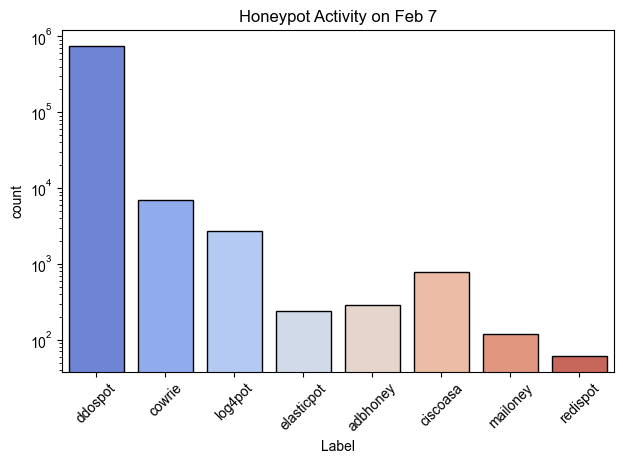

In [14]:
sns.countplot(combined_df, x="Label", hue="Label", edgecolor="black", legend=False , palette= 'coolwarm')
plt.xticks(rotation=45)
sns.set(style="darkgrid")
plt.yscale("log")  # Compresses y-axis scale
plt.title("Honeypot Activity on Feb 7")
plt.tight_layout()
plt.show()


* Ddospot is the most dominant label for this date with the count being at 750,473

* Cowrie being the seocnd highest at 6939

In [15]:
combined_df['Protocol'].value_counts().to_frame()

,count
Protocol,
17,750549
6,11088


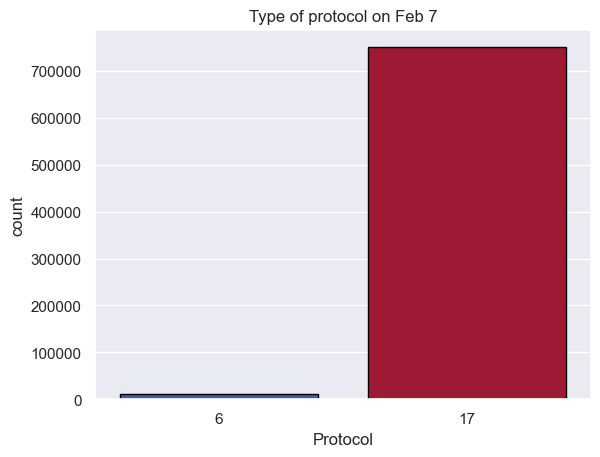

In [16]:
sns.countplot(combined_df, x="Protocol", hue = "Protocol", edgecolor = "black" , palette= 'coolwarm', legend= False)
plt.title("Type of protocol on Feb 7")
plt.show()

* Protocol 17 is the most common in my data with 750,549

In [17]:
top25= combined_df['Source Location'].value_counts().to_frame()
new25 = top25.head(25)

new25



,count
Source Location,
Iran,393304
United States,107139
Japan,45010
Hong Kong,34628
Germany,29457
Singapore,23711
Italy,21394
China,19607
United Kingdom,13919


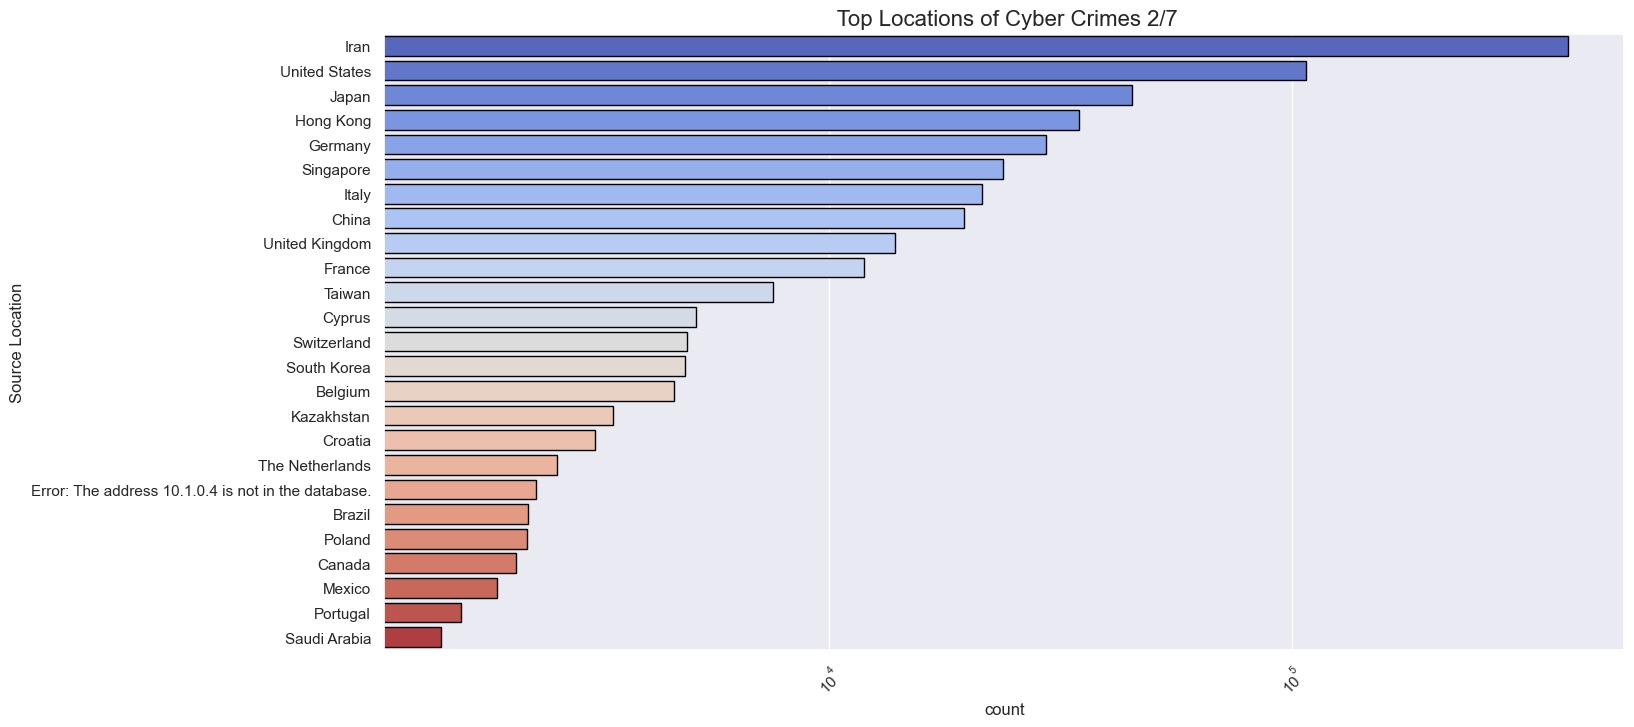

In [20]:
plt.figure(figsize=(16, 8))
sns.barplot(new25, x= "count", y="Source Location", hue='Source Location' ,palette='coolwarm', edgecolor = 'black')
plt.xticks(rotation=45)
plt.xscale("log") 
plt.title(" Top Locations of Cyber Crimes 2/7", fontsize =16)
plt.show()

* Iran is the top location for cybercrimes , follwed by the united states 

In [ ]:
FEB7_DF = combined_df['Destination Location'].value_counts().to_frame()

FEB7_DF

,count
Destination Location,
Error: The address 10.1.0.4 is not in the database.,759083
China,843
United States,749
India,344
Bulgaria,119
United Kingdom,98
Germany,72
The Netherlands,50
Indonesia,40


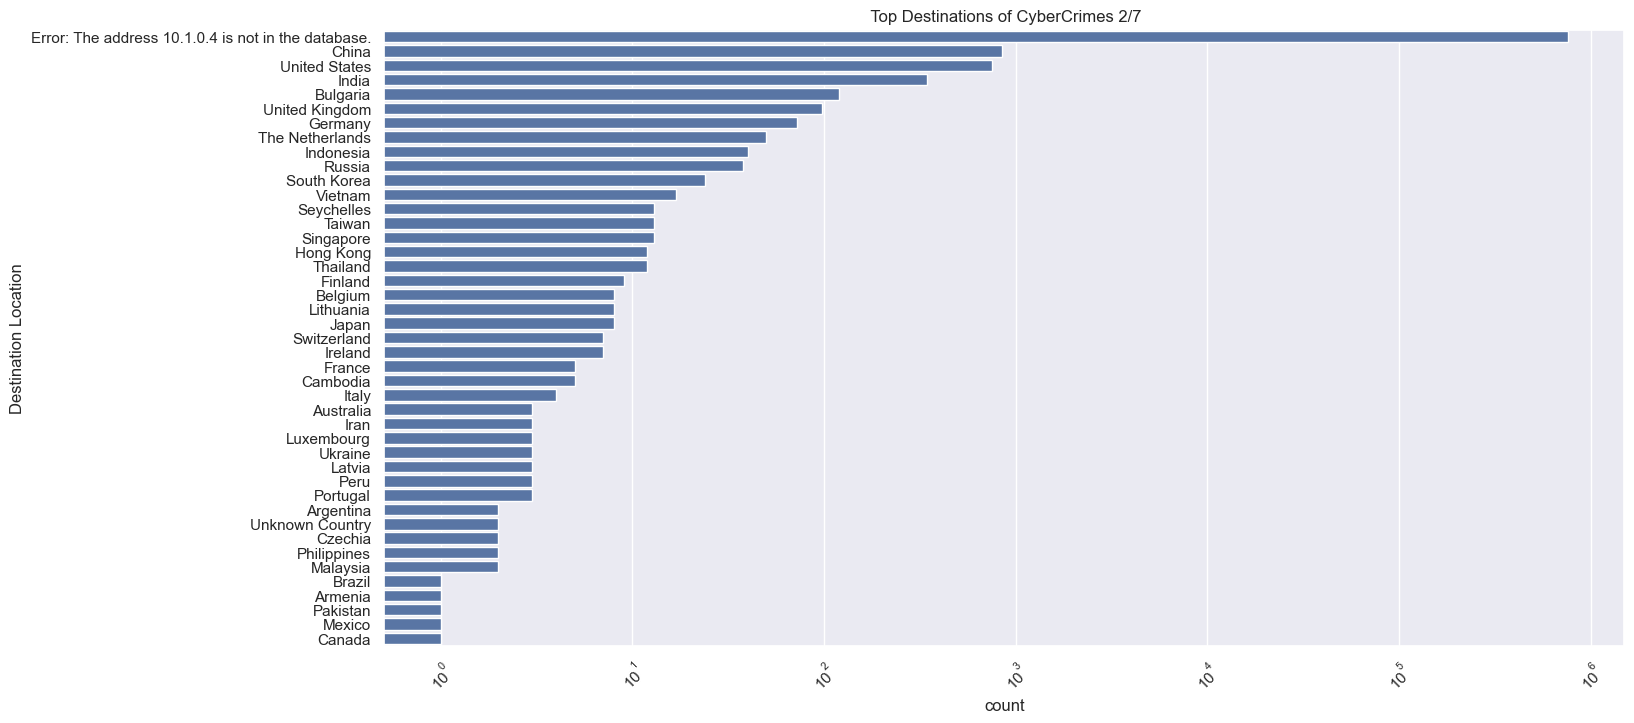

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(FEB7_DF, y= 'Destination Location', x = 'count')
plt.xticks(rotation=45)
plt.xscale("log") 
plt.title(" Top Destinations of CyberCrimes 2/7")
plt.show()

* Top destination for both days  is 10.1.0.4 ip which is the honeypots so it makes sense thats the top destination, followed by China and the united states 

---



# Looking at How Features Relate Across Cyber Attacks

## This section analyzes how different features behave in relation to each other during cyber attacks. We're using correlation heatmaps and visual comparisons to:
 - Identify highly correlated features that may be redundant
 - Understand which metrics move together during attacks
 - Lay the groundwork for feature selection and dashboard insights

### These insights will help reduce noise, avoid overlapping information, and better understand the structure of attack behavior across flows.

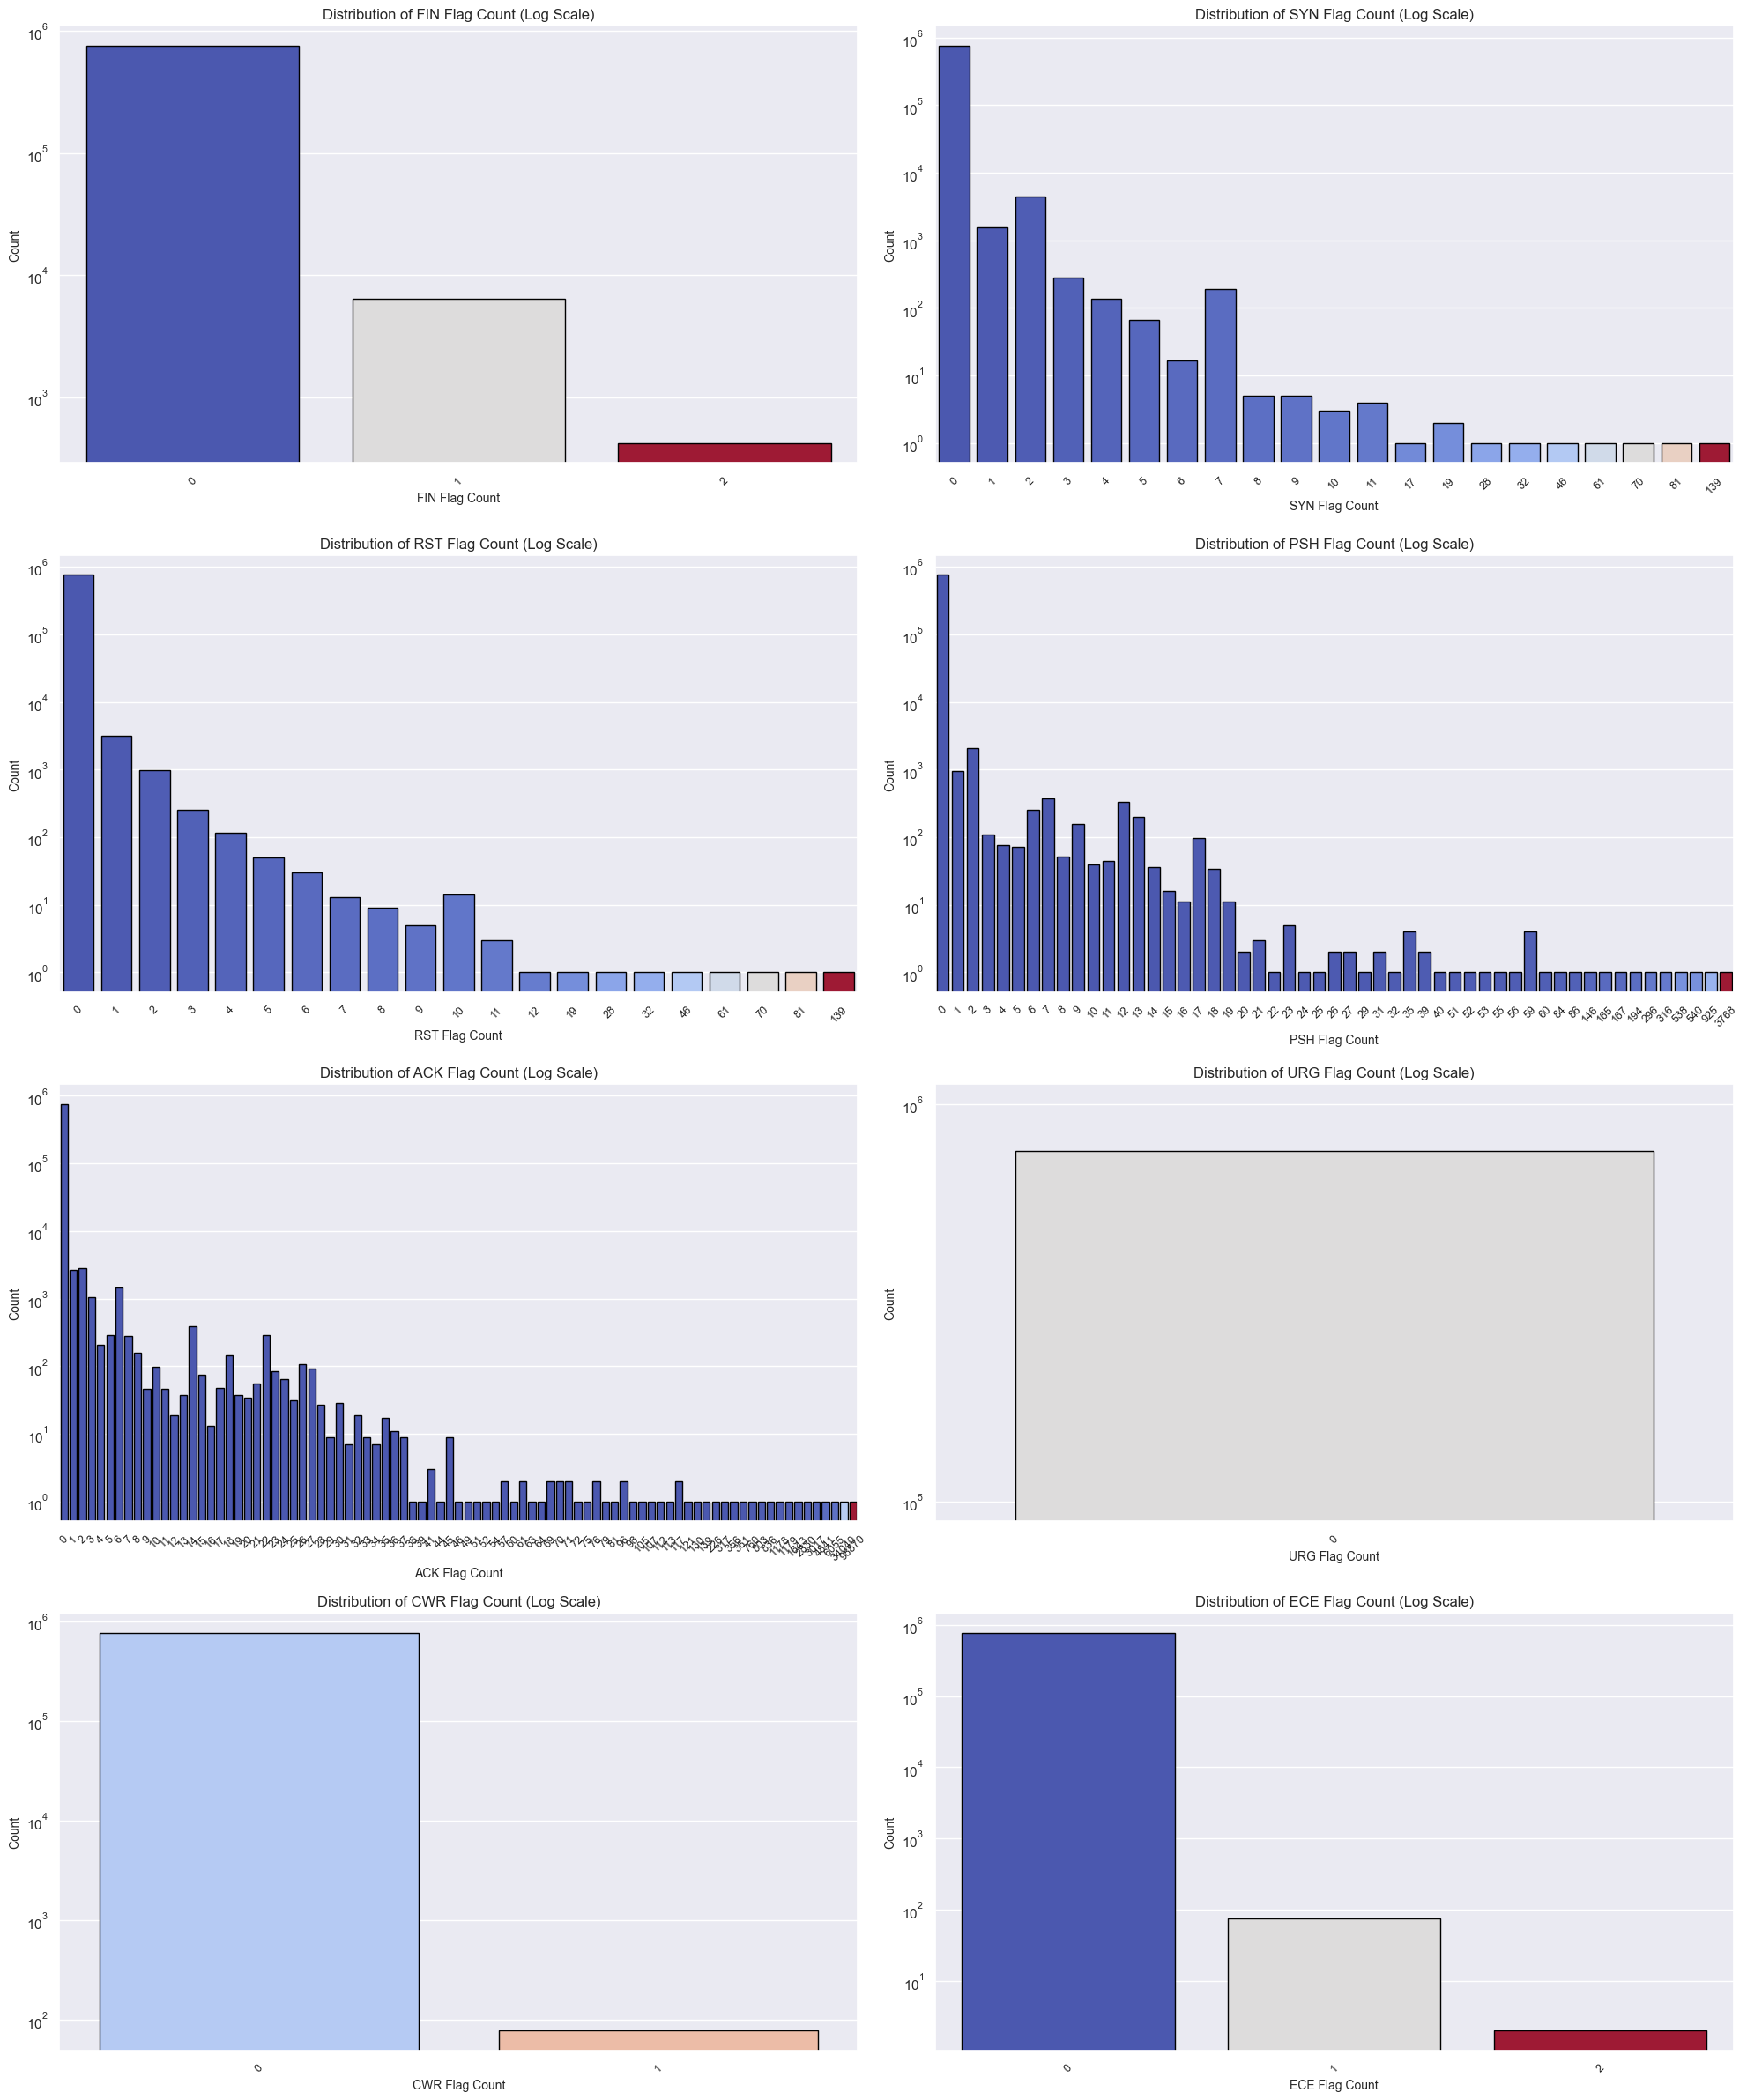

In [ ]:
# List of flag count columns
flag_columns = [
    'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',
    'ACK Flag Count', 'URG Flag Count', 'CWR Flag Count', 'ECE Flag Count'
]

# Set up subplot grid: 4 rows x 2 columns with a larger figure size
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 24)) 
axes = axes.flatten()  # Flatten to index like a list

# Loop through columns and create a countplot for each
for i, flag in enumerate(flag_columns):
    sns.countplot(data=combined_df, x=flag, hue=flag, ax=axes[i],
                  edgecolor='black', palette='coolwarm', legend=False)
    
    axes[i].set_yscale('log')
    axes[i].set_title(f'Distribution of {flag} (Log Scale)', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45, labelsize=9)
    axes[i].set_xlabel(flag, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()


### Fin , CWR, ECE, URG Flags
  - the majority of flows have a count of 0, meaning these flags are rarely used 

### SYN, RST, PSH AND ACK FLAGS 
 - These flags have more variation and wider distributions, especially ACK and PSH.
 - ACK flag shows a broad range of values, suggesting many packets are part of established TCP connections (common in regular web traffic).
 - SYN and RST show higher values at lower counts, which may reflect connection attempts and resets, typical in both normal behavior and scanning activity.

### URG Flag:
 - Nearly all flows have a count of 0, showing it's almost never used, which is expected since URG is outdated in most applications.

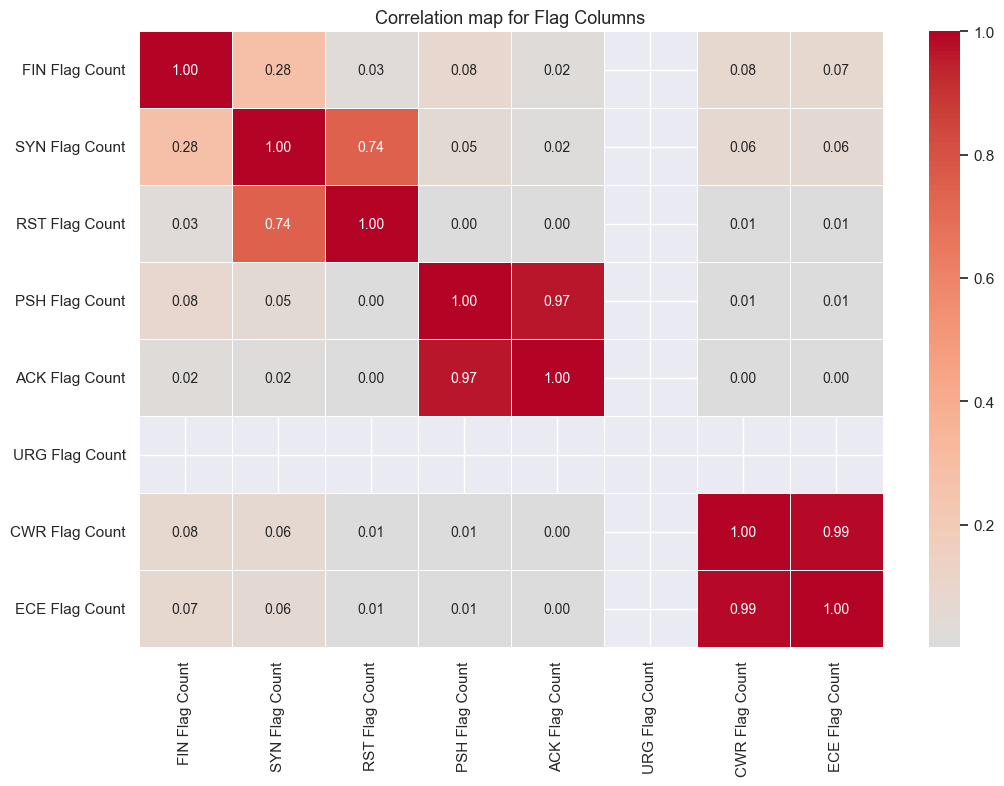

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Correlation map for Flag Columns", fontsize = 13)
sns.heatmap(
    combined_df[flag_columns].corr(),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10}
)
plt.show()

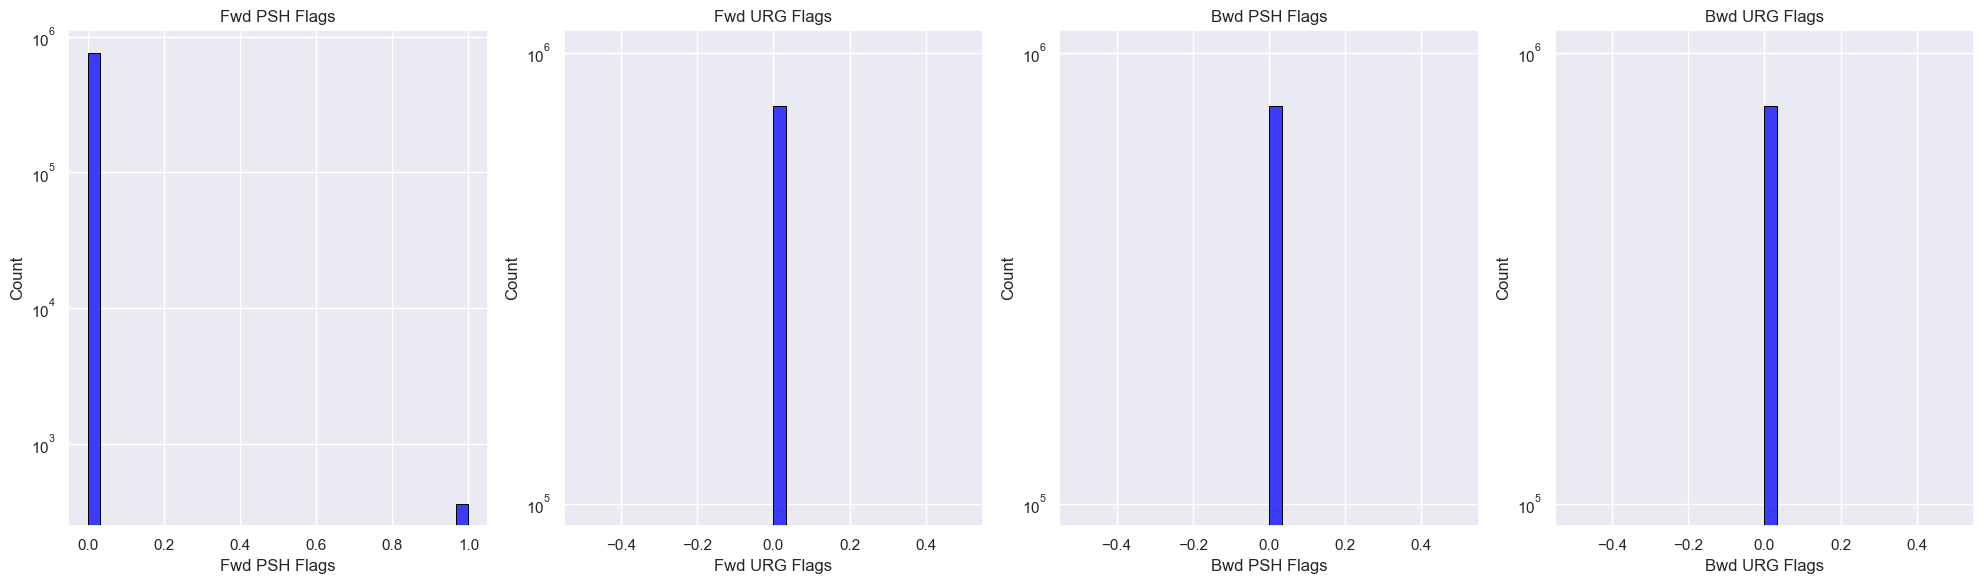

In [ ]:
dir_flags = ['Fwd PSH Flags', 'Fwd URG Flags', 'Bwd PSH Flags', 'Bwd URG Flags']

fig, axes = plt.subplots(1, 4, figsize=(20, 6))

for i, col in enumerate(dir_flags):
    sns.histplot(combined_df[col], ax=axes[i], bins=30, color='blue', edgecolor= "black")
    axes[i].set_yscale('log')
    axes[i].set_title(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


* The bars at 0 dominate in all four subplots, indicating that the vast majority of network flows did not use these flags.
  There's a small spike at 1 in Fwd PSH Flags, but it's minimal compared to the massive count at 0.

* Directional flags are tco control features that indicate the direction of specific flag behavior in the flow. With most of these values leading to zero i am looking to drop them. 

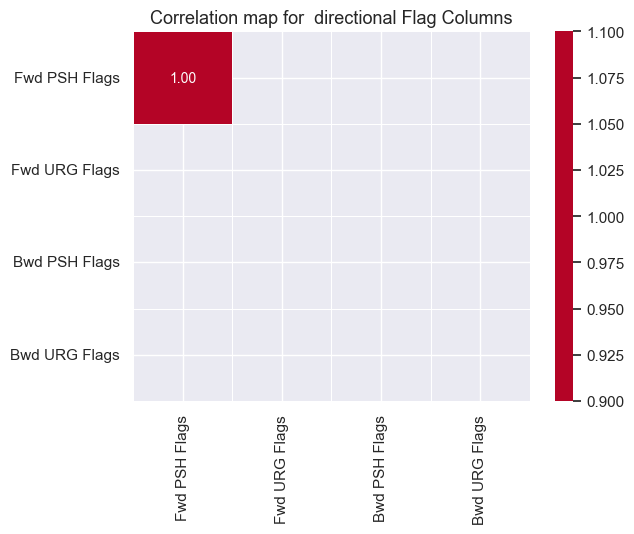

In [ ]:
plt.title("Correlation map for  directional Flag Columns", fontsize = 13)
sns.heatmap(
    combined_df[dir_flags].corr(),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10}
)
plt.show()

* These columns are certainly droppable 

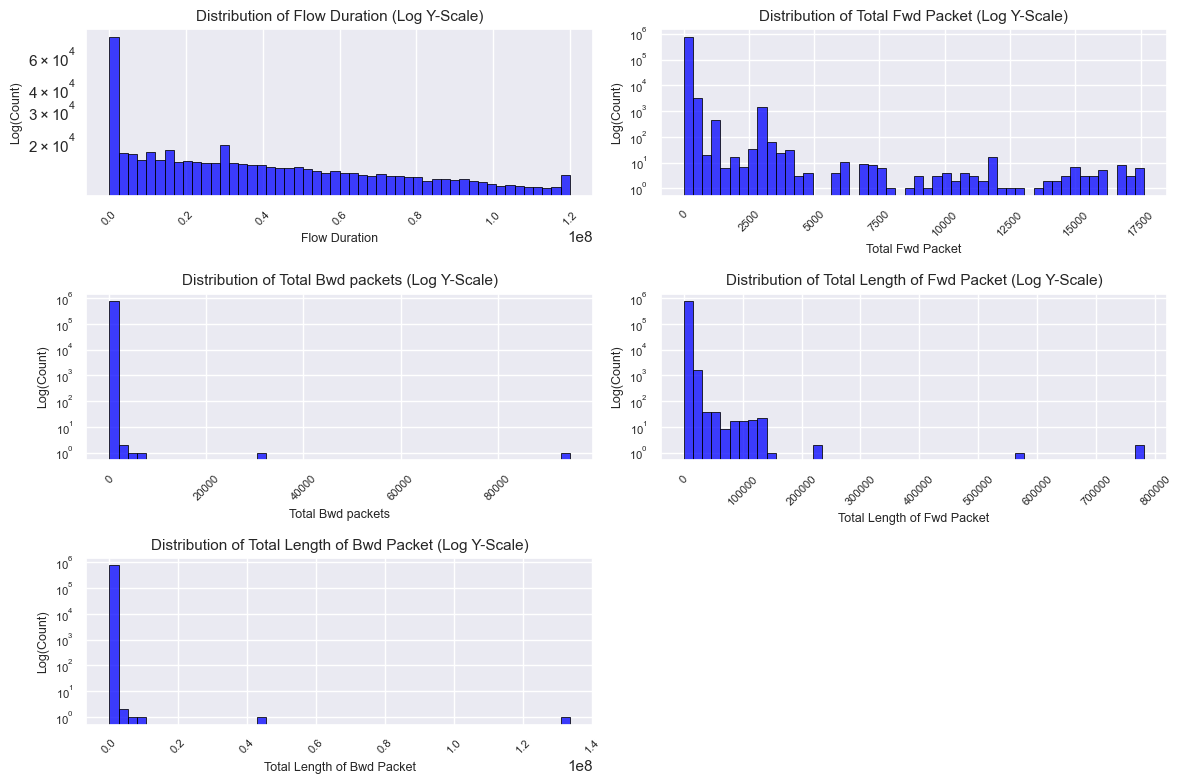

In [ ]:
# Continuous columns
Flow_cols = [
    "Flow Duration", 
    "Total Fwd Packet", 
    "Total Bwd packets", 
    "Total Length of Fwd Packet", 
    "Total Length of Bwd Packet"
    
]

# Set up plot grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
axes = axes.flatten()

# Loop through columns and create histograms
for i, col in enumerate(Flow_cols):
    ax = axes[i]
    sns.histplot(combined_df[col], ax=ax, bins=50,
                 edgecolor="black", color="blue")
    ax.set_yscale("log")  # Log scale on Y-axis
    ax.set_title(f"Distribution of {col} (Log Y-Scale)", fontsize=11)
    ax.set_xlabel(col, fontsize=9)
    ax.set_ylabel("Log(Count)", fontsize=9)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

# Hide the unused 6th subplot
axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


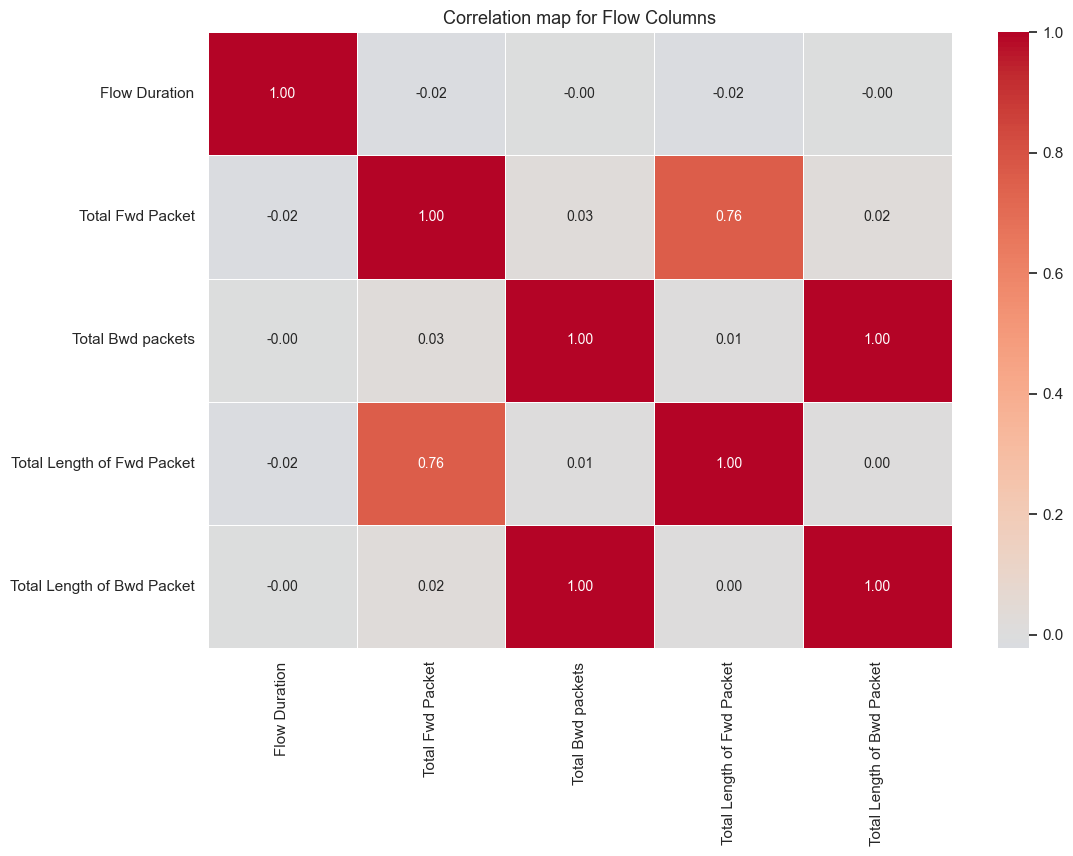

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Correlation map for Flow Columns", fontsize = 13)
sns.heatmap(
    combined_df[Flow_cols].corr(),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10}
)
plt.show()

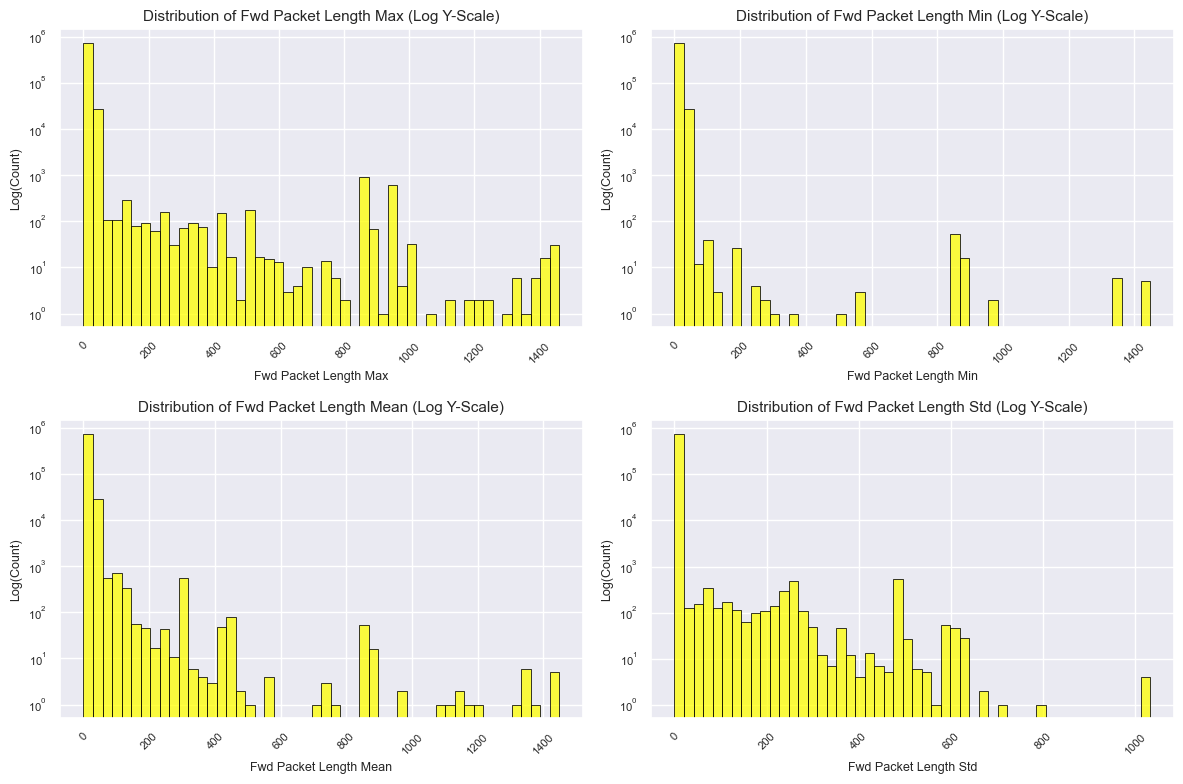

In [ ]:
# Continuous columns
Fwd_Packet_cols = [
    "Fwd Packet Length Max", 
    "Fwd Packet Length Min", 
    "Fwd Packet Length Mean", 
    "Fwd Packet Length Std", 
    
]

# Set up plot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

# Loop through columns and create histograms
for i, col in enumerate(Fwd_Packet_cols):
    ax = axes[i]
    sns.histplot(combined_df[col], ax=ax, bins=50,
                 edgecolor="black", color="yellow")
    ax.set_yscale("log")  # Log scale on Y-axis
    ax.set_title(f"Distribution of {col} (Log Y-Scale)", fontsize=11)
    ax.set_xlabel(col, fontsize=9)
    ax.set_ylabel("Log(Count)", fontsize=9)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)



plt.tight_layout()
plt.show()


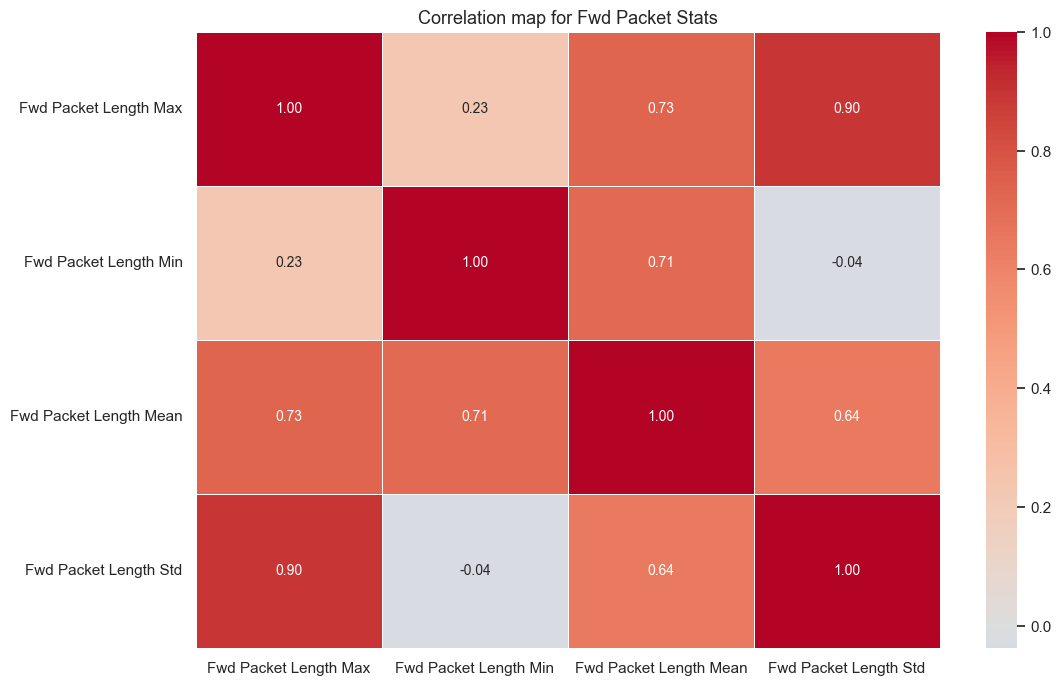

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Correlation map for Fwd Packet Stats", fontsize = 13)
sns.heatmap(
    combined_df[Fwd_Packet_cols].corr(),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10}
)
plt.show()

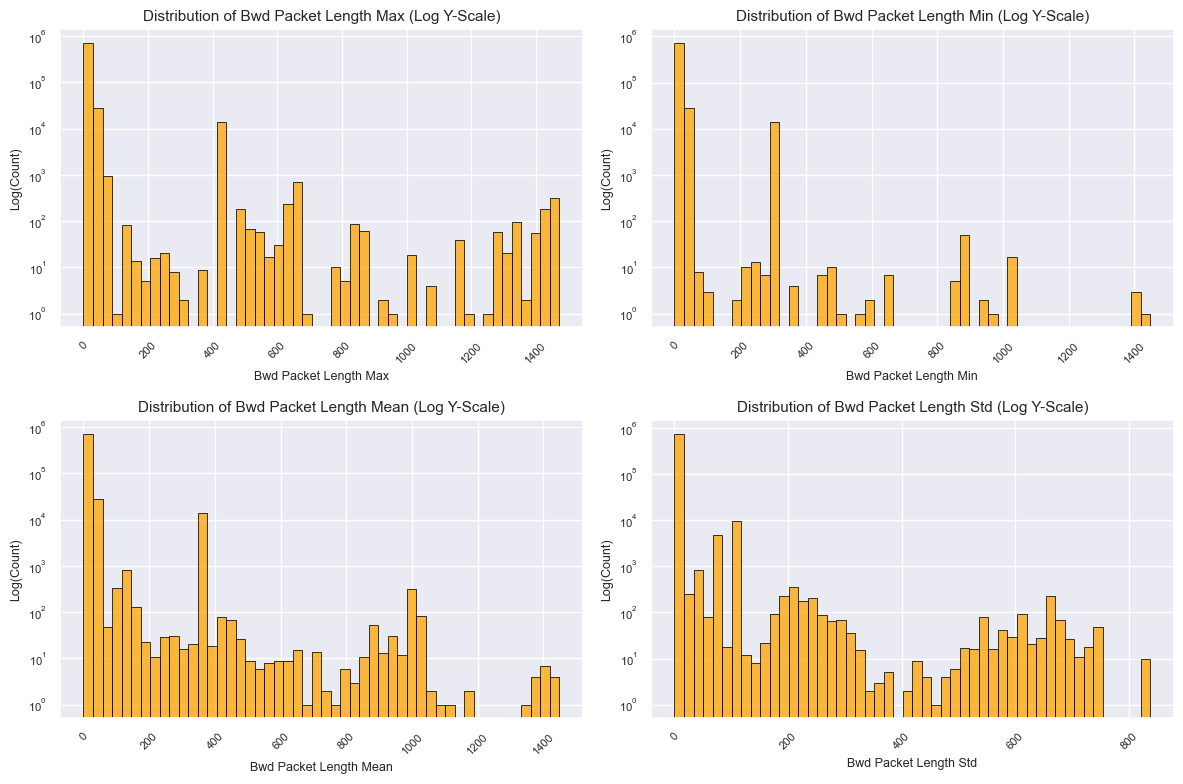

In [ ]:
# Continuous columns
Bwd_Packet_cols = [
    "Bwd Packet Length Max", 
    "Bwd Packet Length Min", 
    "Bwd Packet Length Mean", 
    "Bwd Packet Length Std", 
    
]

# Set up plot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

# Loop through columns and create histograms
for i, col in enumerate(Bwd_Packet_cols):
    ax = axes[i]
    sns.histplot(combined_df[col], ax=ax, bins=50,
                 edgecolor="black", color="Orange")
    ax.set_yscale("log")  # Log scale on Y-axis
    ax.set_title(f"Distribution of {col} (Log Y-Scale)", fontsize=11)
    ax.set_xlabel(col, fontsize=9)
    ax.set_ylabel("Log(Count)", fontsize=9)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)



plt.tight_layout()
plt.show()


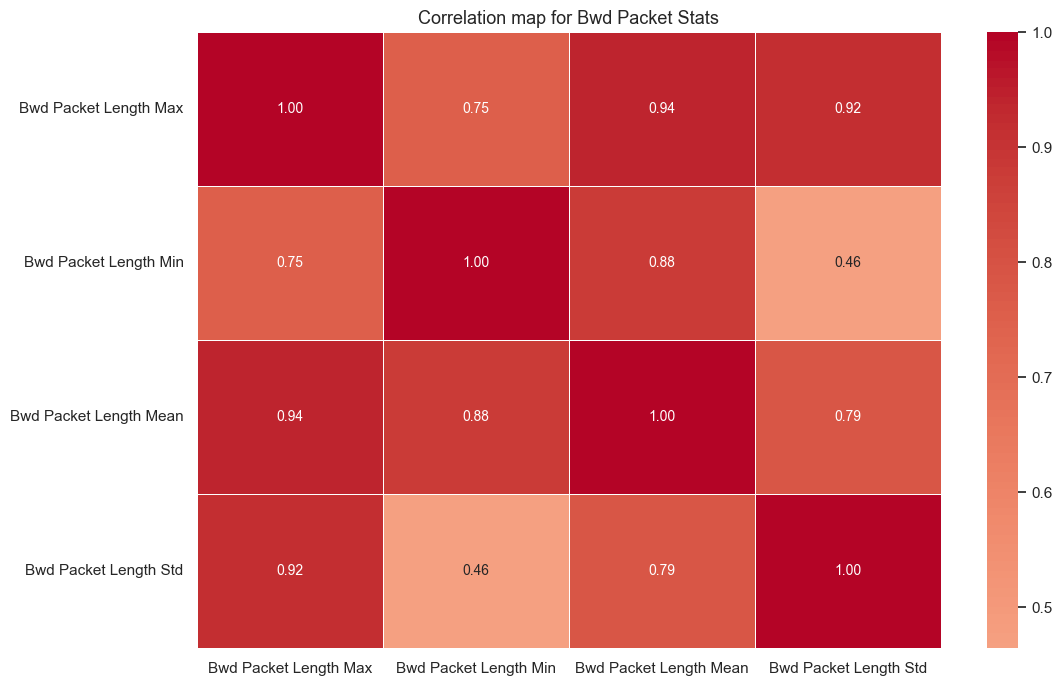

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Correlation map for Bwd Packet Stats", fontsize = 13)
sns.heatmap(
    combined_df[Bwd_Packet_cols].corr(),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10}
)
plt.show()

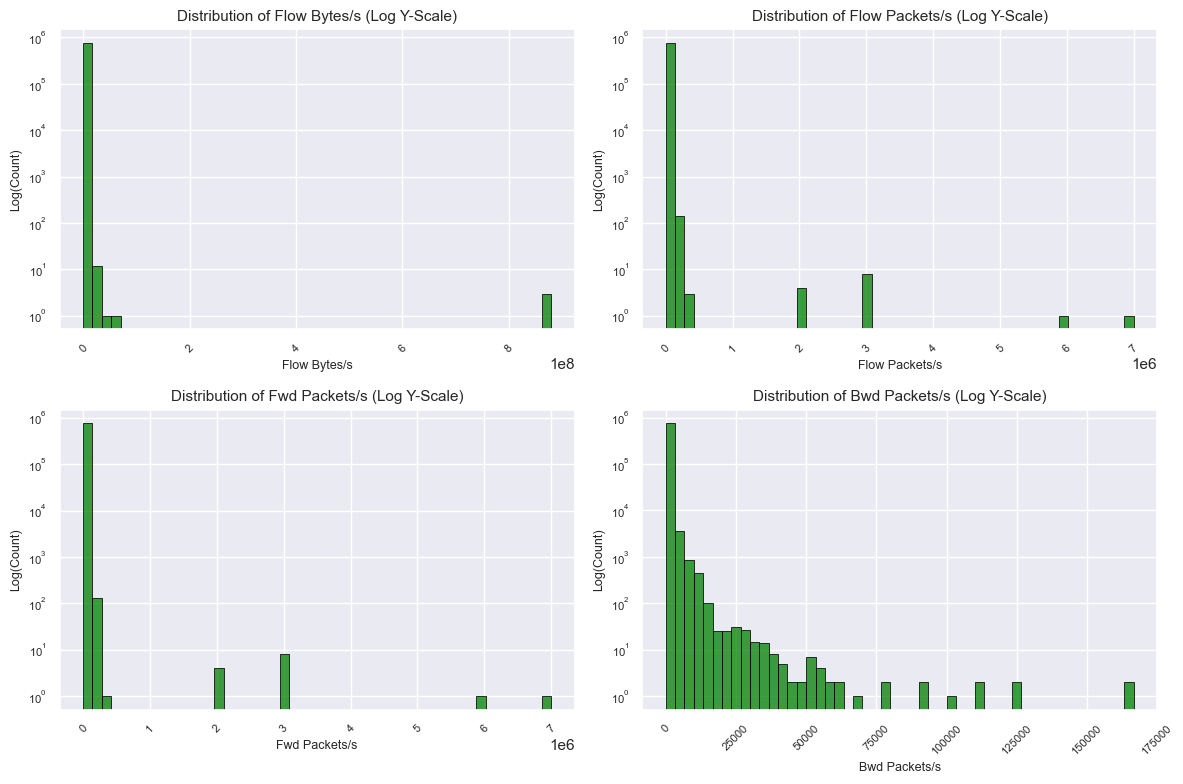

In [ ]:
# Continuous columns
Throughput_rates_cols = [
    "Flow Bytes/s",
    "Flow Packets/s", 
    "Fwd Packets/s",
    "Bwd Packets/s" 
    
]

# Set up plot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

# Loop through columns and create histograms
for i, col in enumerate(Throughput_rates_cols):
    ax = axes[i]
    sns.histplot(combined_df[col], ax=ax, bins=50,
                 edgecolor="black", color="Green")
    ax.set_yscale("log")  # Log scale on Y-axis
    ax.set_title(f"Distribution of {col} (Log Y-Scale)", fontsize=11)
    ax.set_xlabel(col, fontsize=9)
    ax.set_ylabel("Log(Count)", fontsize=9)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)



plt.tight_layout()
plt.show()


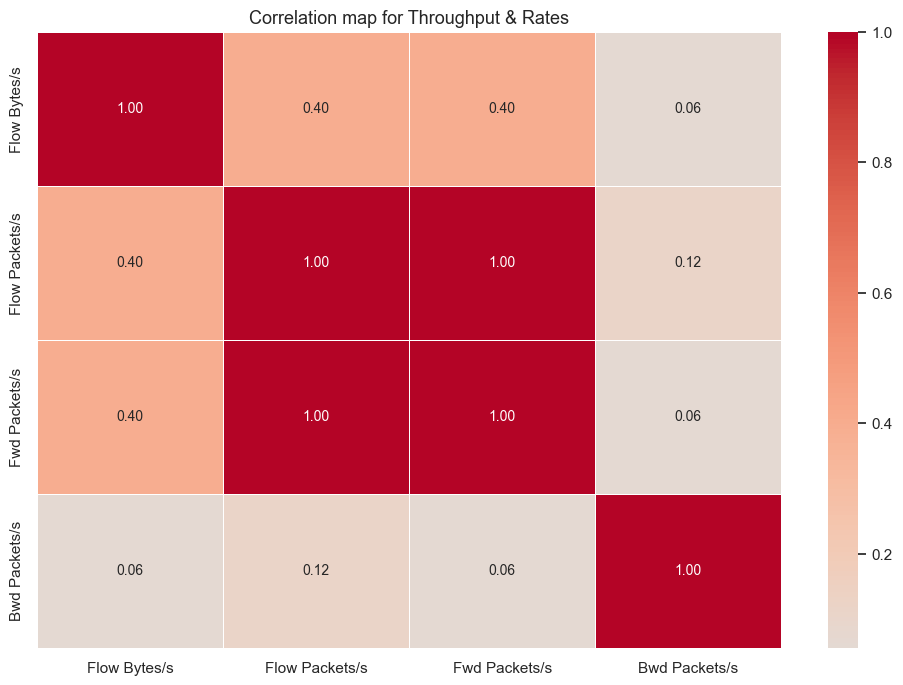

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Correlation map for Throughput & Rates", fontsize = 13)
sns.heatmap(
    combined_df[Throughput_rates_cols].corr(),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10}
)
plt.show()

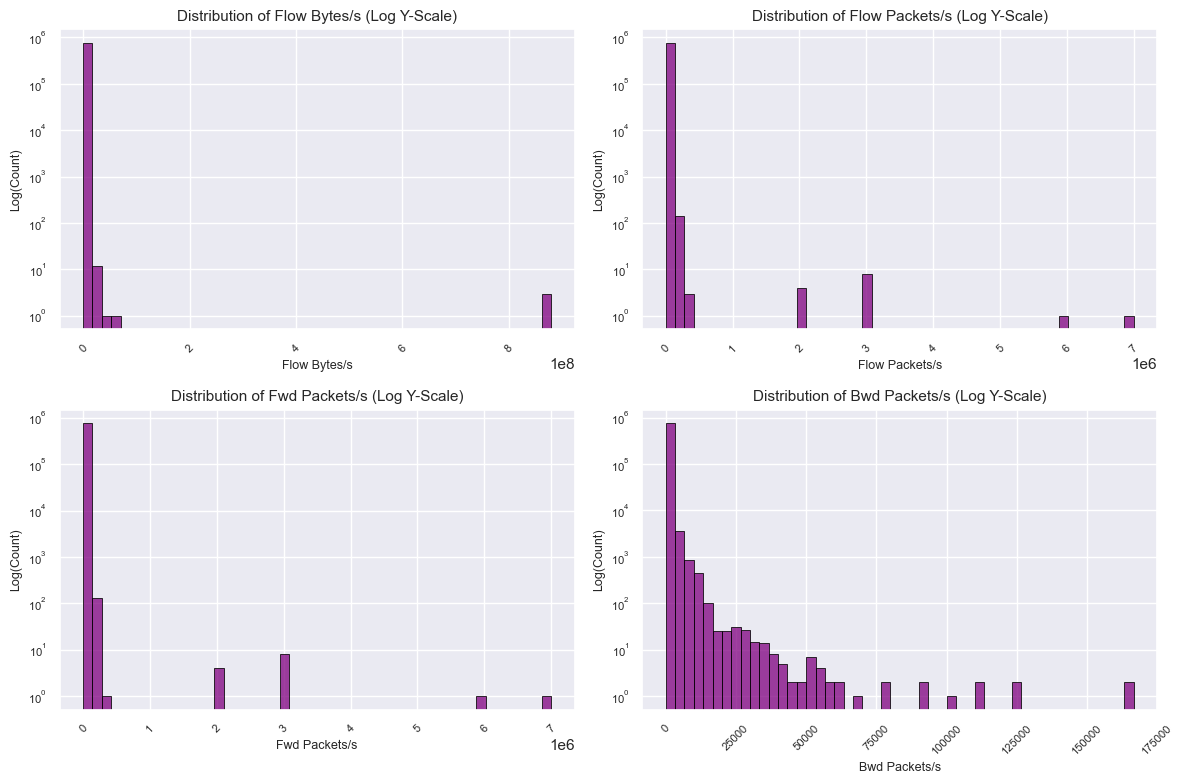

In [ ]:

Flow_IAT_cols = [
    "Flow IAT Mean",
    "Flow IAT Std",
    "Flow IAT Max",
    "Flow IAT Min"
    
    
    
]

# Set up plot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

# Loop through columns and create histograms
for i, col in enumerate(Throughput_rates_cols):
    ax = axes[i]
    sns.histplot(combined_df[col], ax=ax, bins=50,
                 edgecolor="black", color="Purple")
    ax.set_yscale("log")  # Log scale on Y-axis
    ax.set_title(f"Distribution of {col} (Log Y-Scale)", fontsize=11)
    ax.set_xlabel(col, fontsize=9)
    ax.set_ylabel("Log(Count)", fontsize=9)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)




plt.tight_layout()
plt.show()


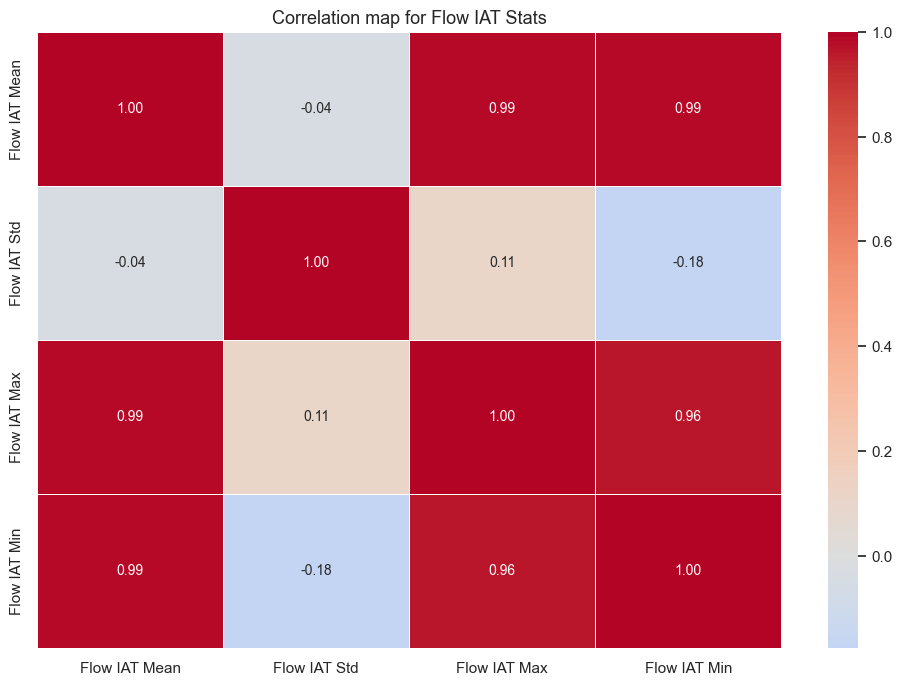

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Correlation map for Flow IAT Stats", fontsize = 13)
sns.heatmap(
    combined_df[Flow_IAT_cols].corr(),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10}
)
plt.show()

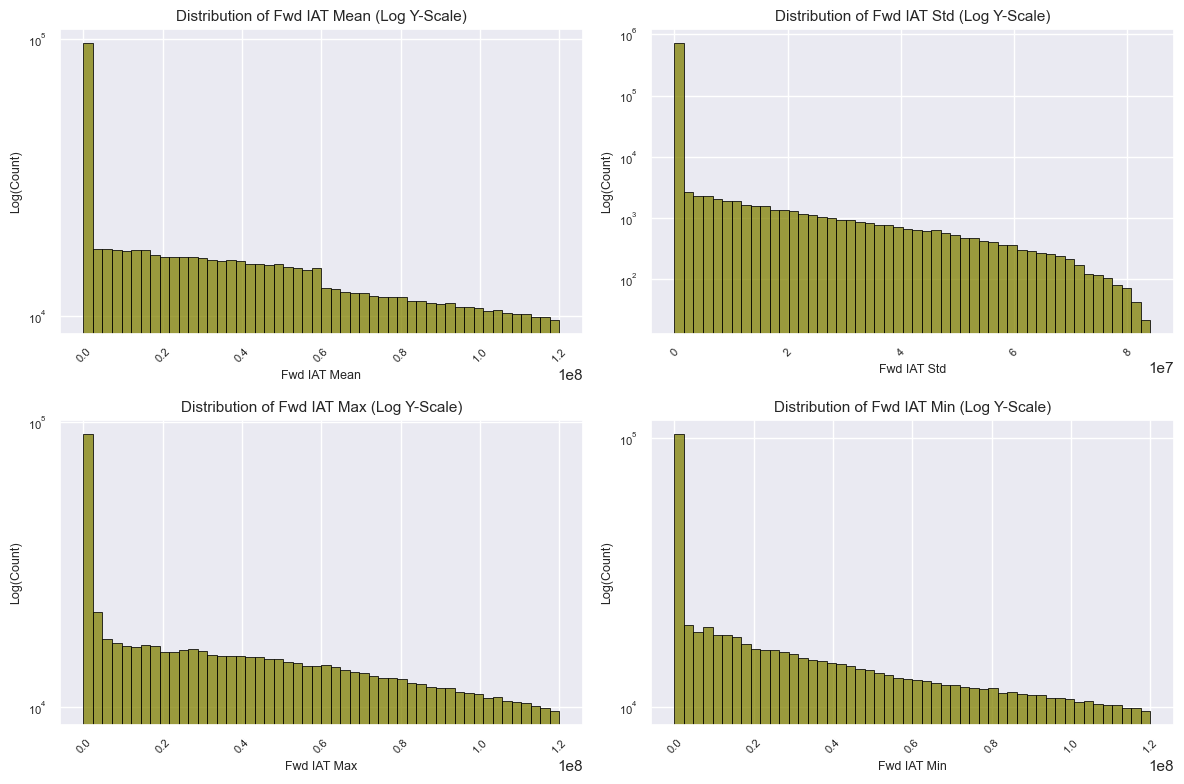

In [ ]:

Fwd_IAT_cols = [
    "Fwd IAT Mean",
    "Fwd IAT Std",
    "Fwd IAT Max",
    "Fwd IAT Min"
    
]

# Set up plot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

# Loop through columns and create histograms
for i, col in enumerate(Fwd_IAT_cols):
    ax = axes[i]
    sns.histplot(combined_df[col], ax=ax, bins=50,
                 edgecolor="black", color="olive")
    ax.set_yscale("log")  # Log scale on Y-axis
    ax.set_title(f"Distribution of {col} (Log Y-Scale)", fontsize=11)
    ax.set_xlabel(col, fontsize=9)
    ax.set_ylabel("Log(Count)", fontsize=9)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)



plt.tight_layout()
plt.show()


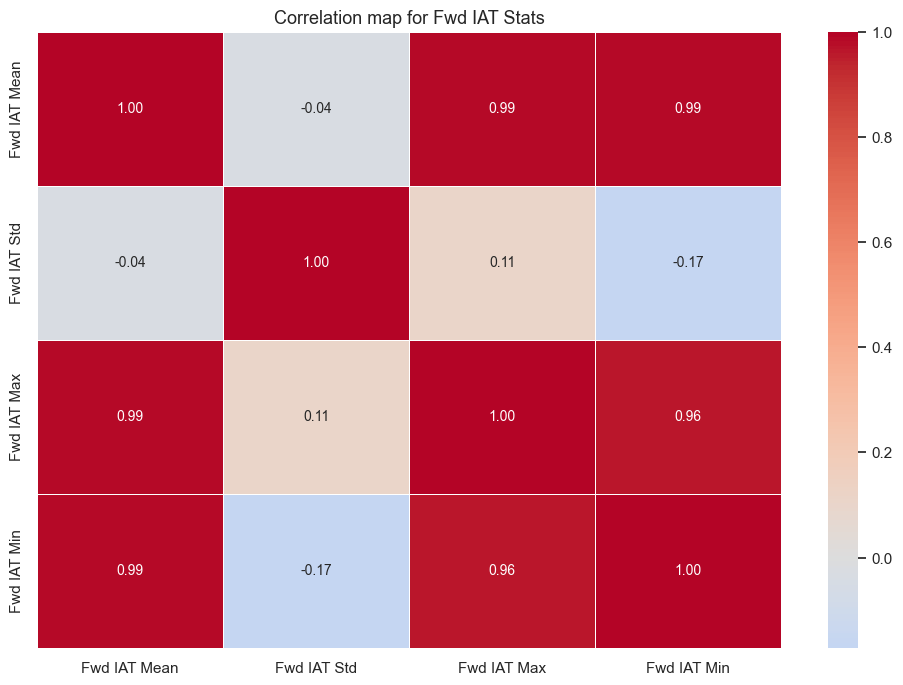

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Correlation map for Fwd IAT Stats", fontsize = 13)
sns.heatmap(
    combined_df[Fwd_IAT_cols].corr(),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10}
)
plt.show()

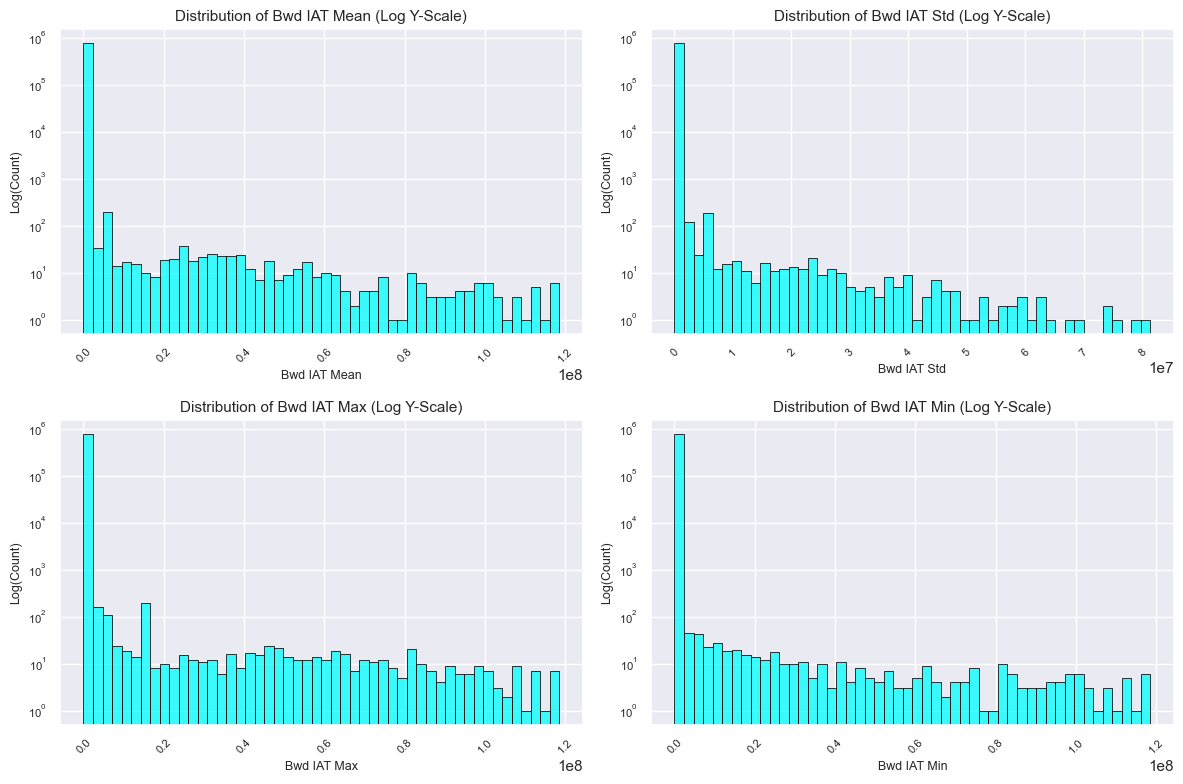

In [ ]:

Bwd_IAT_cols = [
    "Bwd IAT Mean",
    "Bwd IAT Std",
    "Bwd IAT Max",
    "Bwd IAT Min"
    
]

# Set up plot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(Bwd_IAT_cols):
    ax = axes[i]
    sns.histplot(combined_df[col], ax=ax, bins=50,
                 edgecolor="black", color="cyan")
    ax.set_yscale("log")  # Log scale on Y-axis
    ax.set_title(f"Distribution of {col} (Log Y-Scale)", fontsize=11)
    ax.set_xlabel(col, fontsize=9)
    ax.set_ylabel("Log(Count)", fontsize=9)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)



plt.tight_layout()
plt.show()


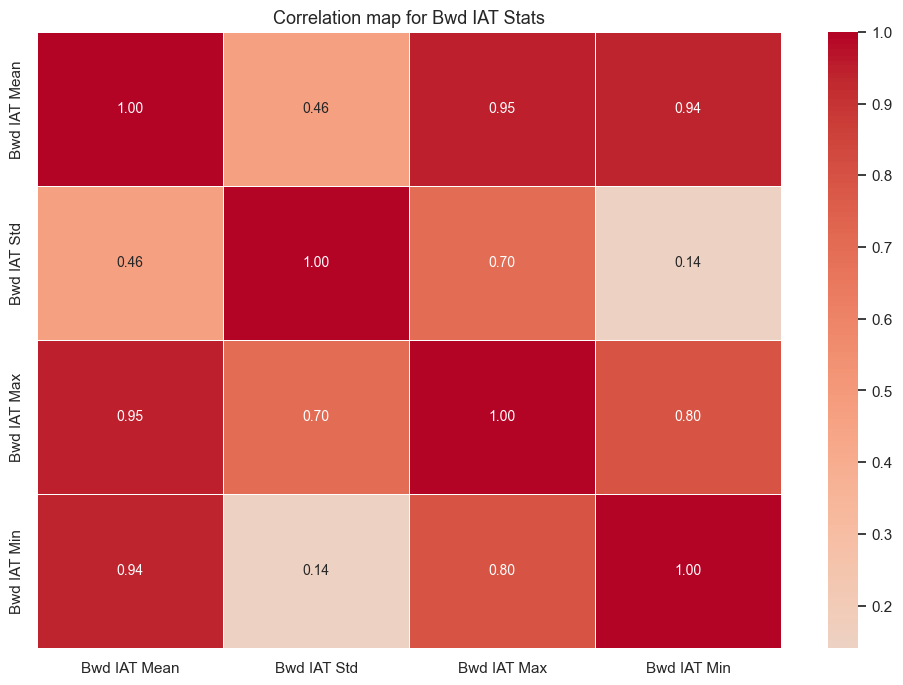

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Correlation map for Bwd IAT Stats", fontsize = 13)
sns.heatmap(
    combined_df[Bwd_IAT_cols].corr(),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10}
)
plt.show()

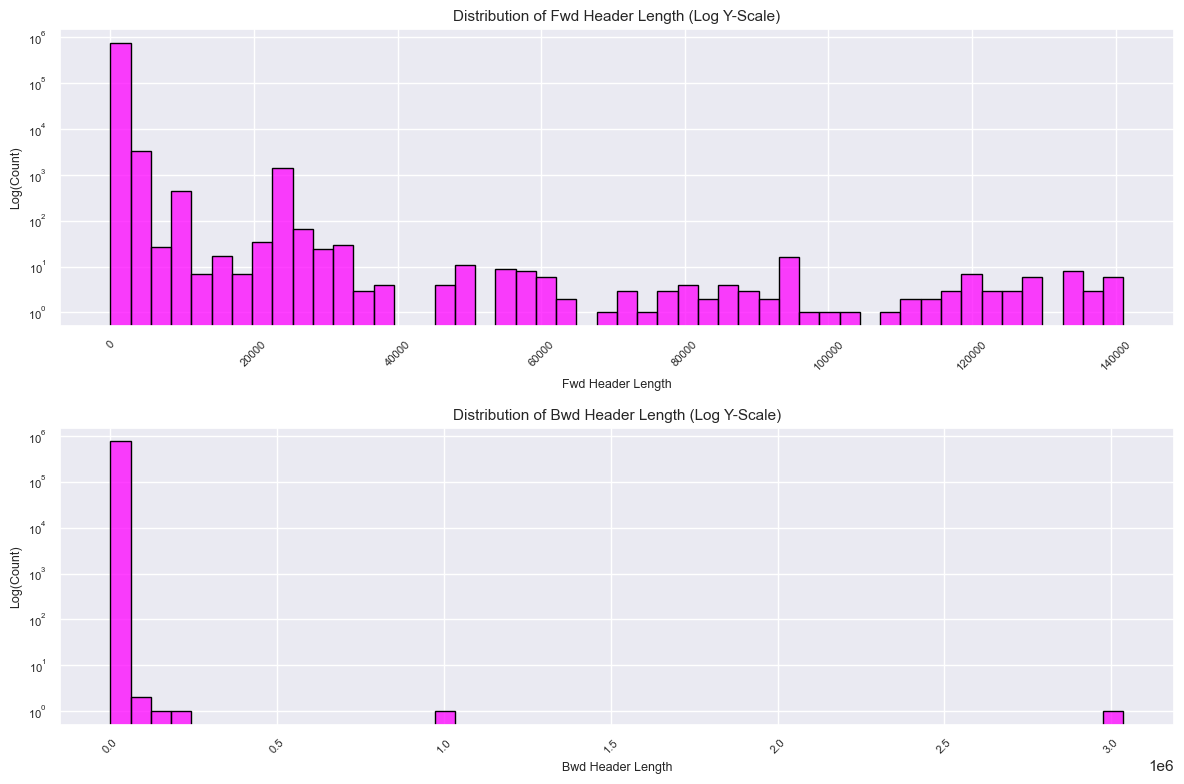

In [ ]:

Header_cols = [
    "Fwd Header Length",
    "Bwd Header Length"
    
    
]

# Set up plot grid
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(Header_cols):
    ax = axes[i]
    sns.histplot(combined_df[col], ax=ax, bins=50,
                 edgecolor="black", color="magenta")
    ax.set_yscale("log")  # Log scale on Y-axis
    ax.set_title(f"Distribution of {col} (Log Y-Scale)", fontsize=11)
    ax.set_xlabel(col, fontsize=9)
    ax.set_ylabel("Log(Count)", fontsize=9)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)



plt.tight_layout()
plt.show()


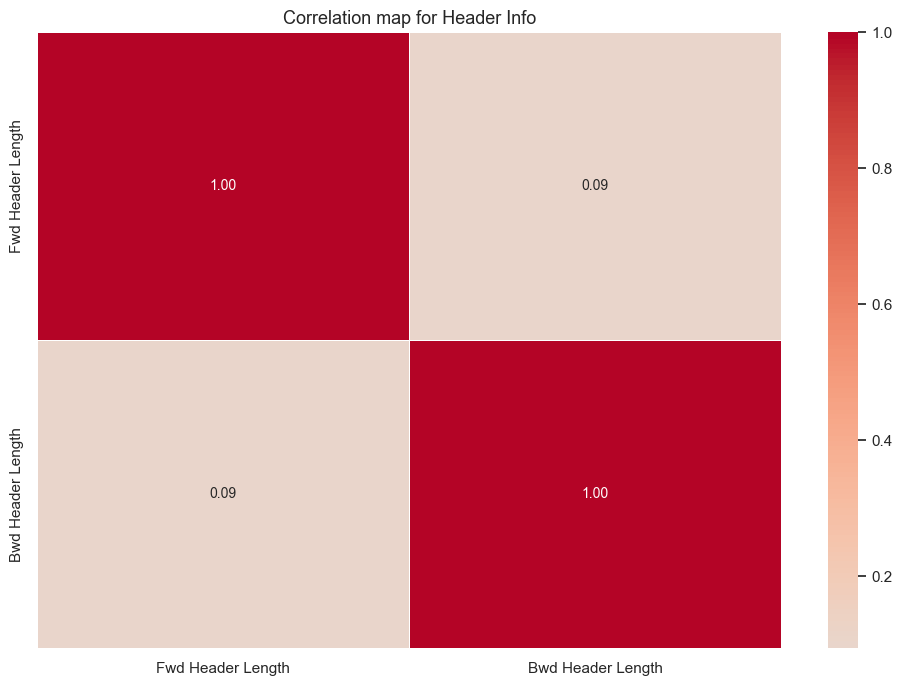

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Correlation map for Header Info", fontsize = 13)
sns.heatmap(
    combined_df[Header_cols].corr(),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10}
)
plt.show()

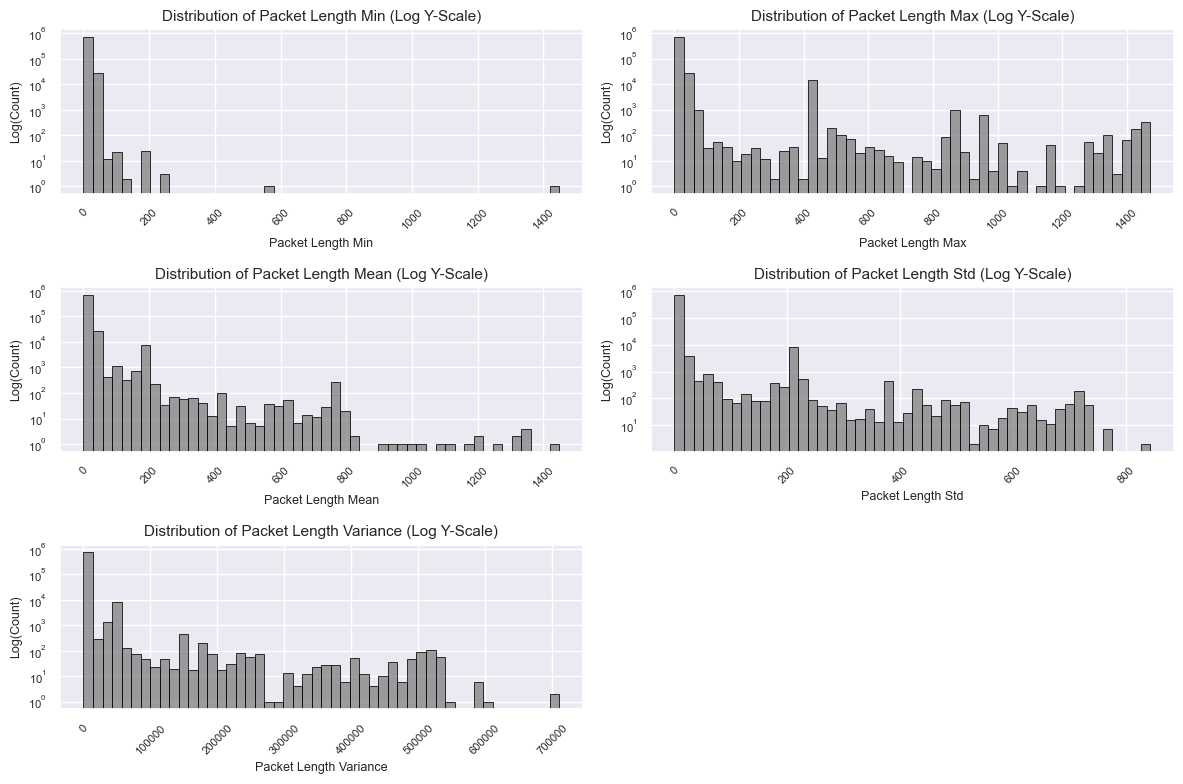

In [ ]:

Packet_length_cols = [
    "Packet Length Min",
    "Packet Length Max", 
    "Packet Length Mean",
    "Packet Length Std",
    "Packet Length Variance"
    
    
]

# Set up plot grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(Packet_length_cols):
    ax = axes[i]
    sns.histplot(combined_df[col], ax=ax, bins=50,
                 edgecolor="black", color="gray")
    ax.set_yscale("log")  # Log scale on Y-axis
    ax.set_title(f"Distribution of {col} (Log Y-Scale)", fontsize=11)
    ax.set_xlabel(col, fontsize=9)
    ax.set_ylabel("Log(Count)", fontsize=9)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

# Hide the unused 6th subplot
axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


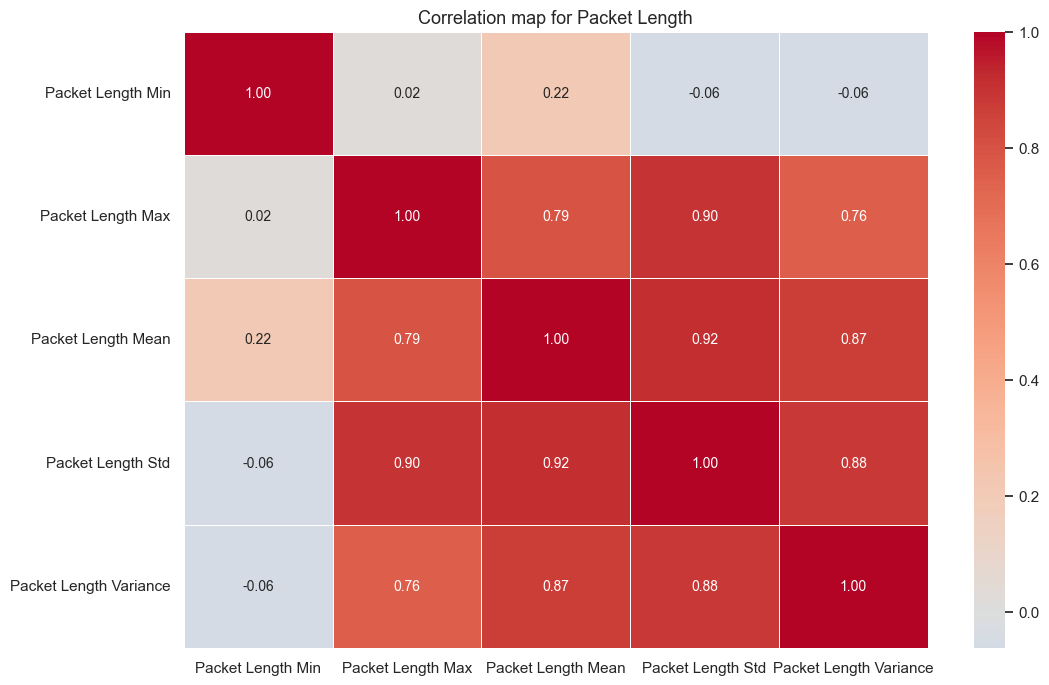

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Correlation map for Packet Length", fontsize = 13)
sns.heatmap(
    combined_df[Packet_length_cols].corr(),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10}
)
plt.show()

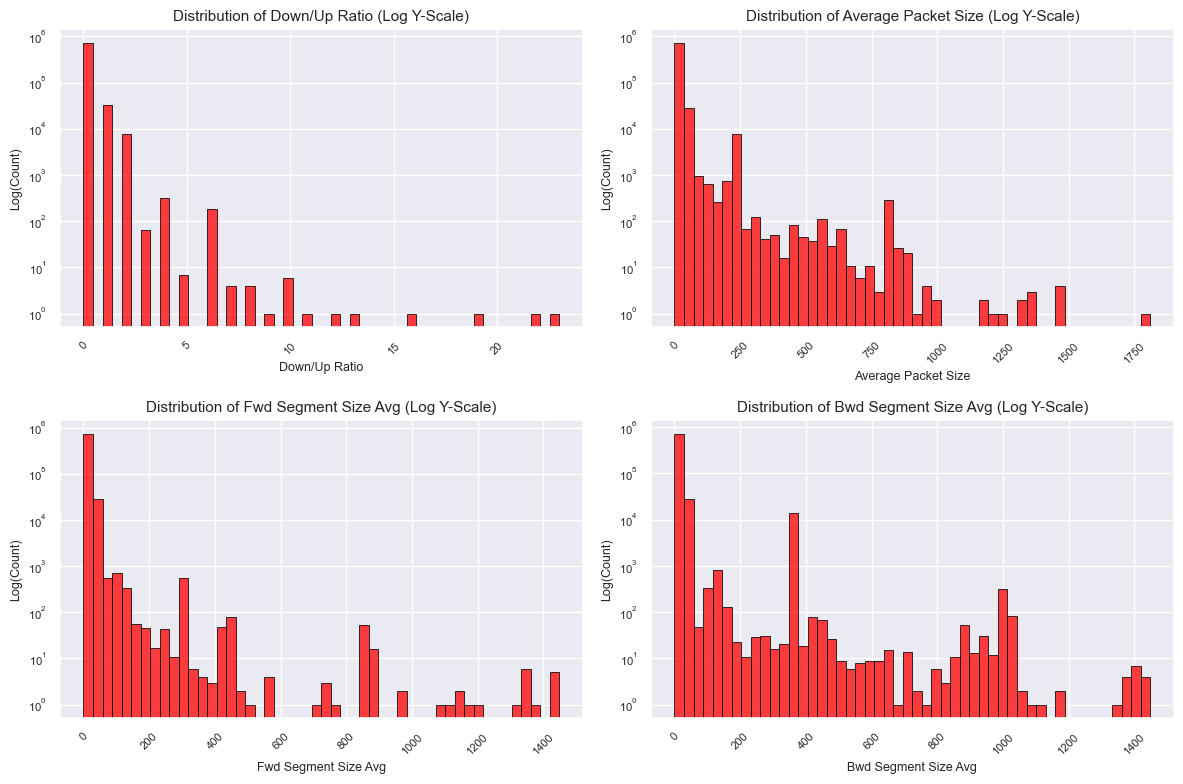

In [ ]:

Ratio_Size_cols = [
    "Down/Up Ratio",
    "Average Packet Size",
    "Fwd Segment Size Avg",
    "Bwd Segment Size Avg"
    
    
]

# Set up plot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(Ratio_Size_cols):
    ax = axes[i]
    sns.histplot(combined_df[col], ax=ax, bins=50,
                 edgecolor="black", color="red")
    ax.set_yscale("log")  # Log scale on Y-axis
    ax.set_title(f"Distribution of {col} (Log Y-Scale)", fontsize=11)
    ax.set_xlabel(col, fontsize=9)
    ax.set_ylabel("Log(Count)", fontsize=9)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)




plt.tight_layout()
plt.show()


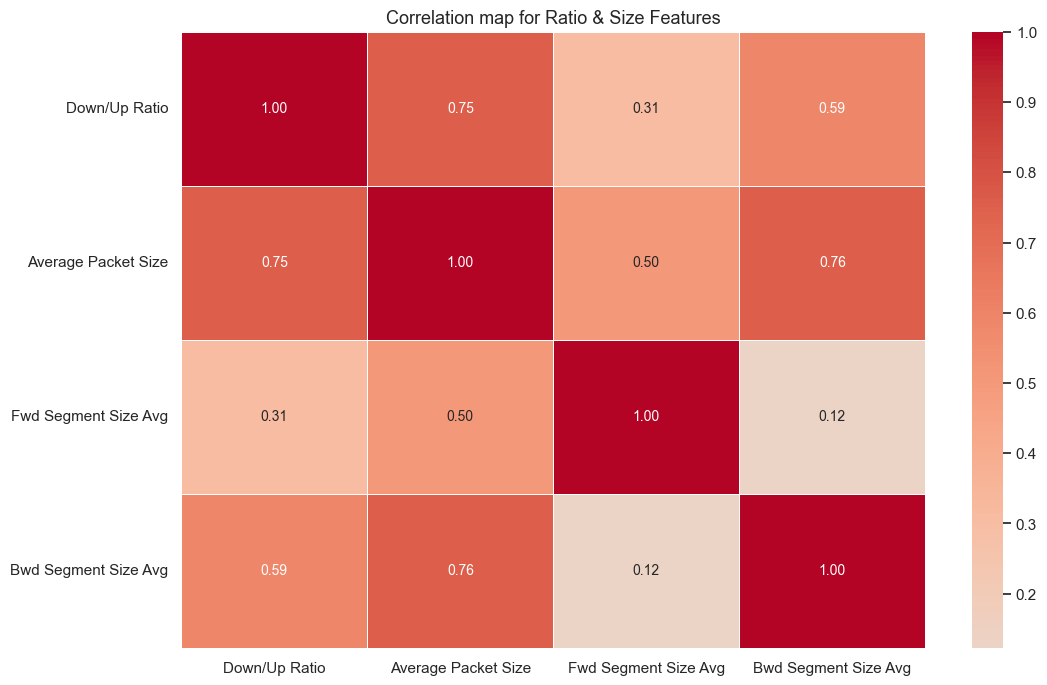

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Correlation map for Ratio & Size Features", fontsize = 13)
sns.heatmap(
    combined_df[Ratio_Size_cols].corr(),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10}
)
plt.show()

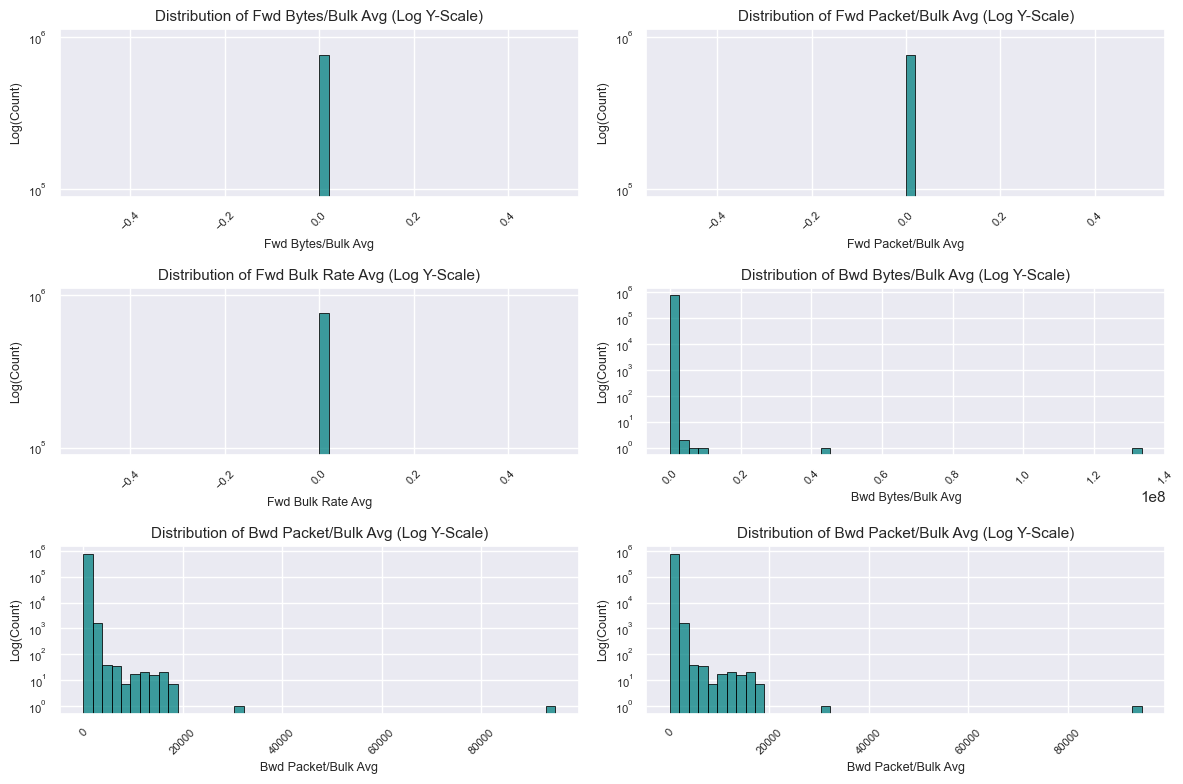

In [ ]:
Bulk_Transfer_Features = [
    "Fwd Bytes/Bulk Avg",
    "Fwd Packet/Bulk Avg",
    "Fwd Bulk Rate Avg",
    "Bwd Bytes/Bulk Avg",
    "Bwd Packet/Bulk Avg",
    "Bwd Packet/Bulk Avg"
    
    
]

# Set up plot grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(Bulk_Transfer_Features):
    ax = axes[i]
    sns.histplot(combined_df[col], ax=ax, bins=50,
                 edgecolor="black", color="teal")
    ax.set_yscale("log")  # Log scale on Y-axis
    ax.set_title(f"Distribution of {col} (Log Y-Scale)", fontsize=11)
    ax.set_xlabel(col, fontsize=9)
    ax.set_ylabel("Log(Count)", fontsize=9)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)




plt.tight_layout()
plt.show()

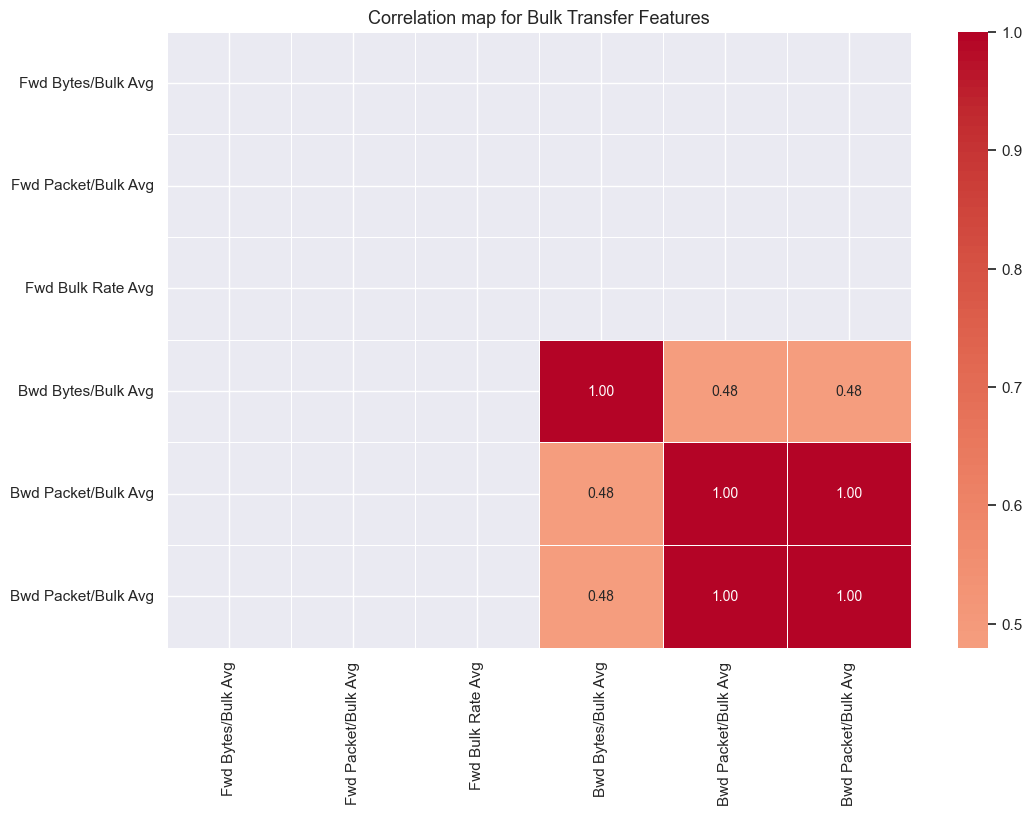

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Correlation map for Bulk Transfer Features", fontsize = 13)
sns.heatmap(
    combined_df[Bulk_Transfer_Features].corr(),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10}
)
plt.show()

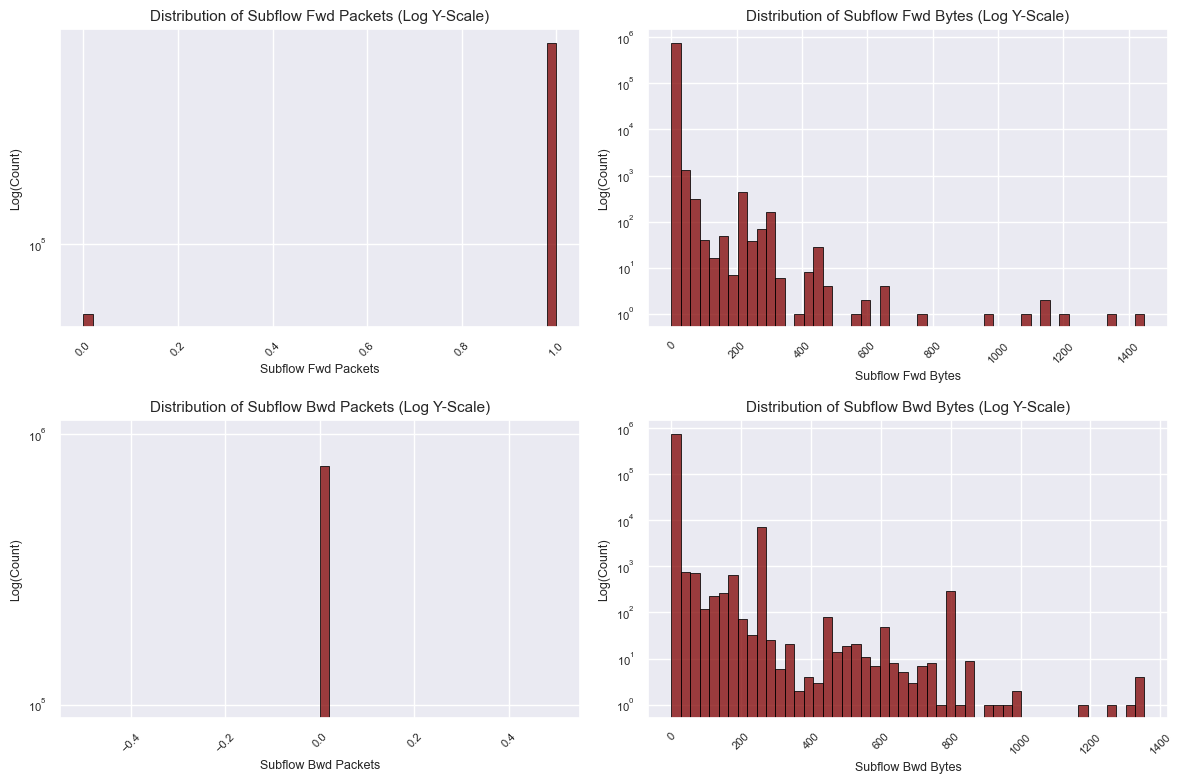

In [ ]:
Subflow_cols = [
    "Subflow Fwd Packets",
    "Subflow Fwd Bytes",
    "Subflow Bwd Packets",
    "Subflow Bwd Bytes"
    
    
]

# Set up plot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(Subflow_cols):
    ax = axes[i]
    sns.histplot(combined_df[col], ax=ax, bins=50,
                 edgecolor="black", color="maroon")
    ax.set_yscale("log")  # Log scale on Y-axis
    ax.set_title(f"Distribution of {col} (Log Y-Scale)", fontsize=11)
    ax.set_xlabel(col, fontsize=9)
    ax.set_ylabel("Log(Count)", fontsize=9)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)




plt.tight_layout()
plt.show()


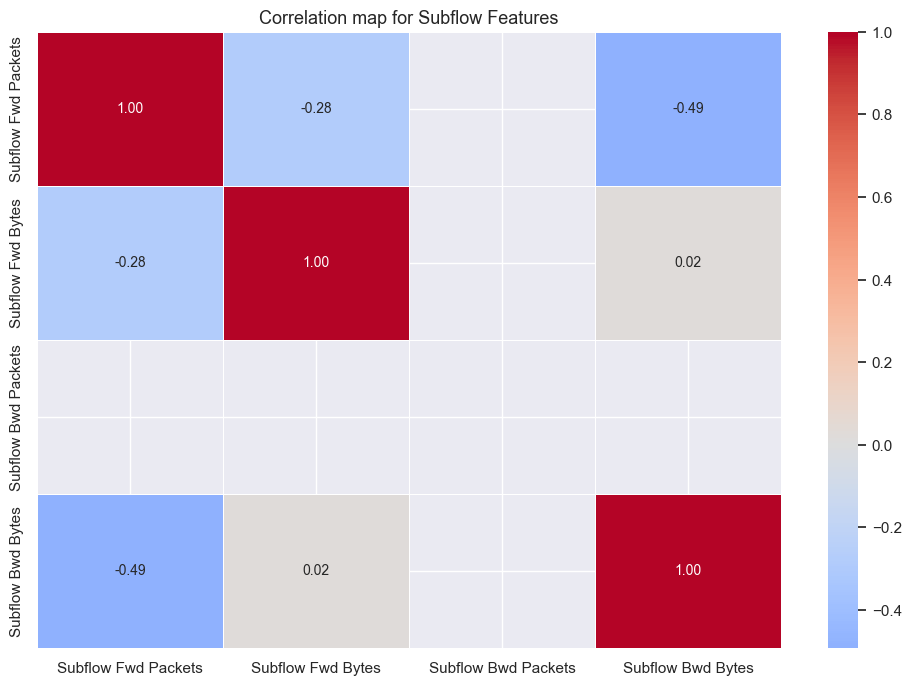

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Correlation map for Subflow Features", fontsize = 13)
sns.heatmap(
    combined_df[Subflow_cols].corr(),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10}
)
plt.show()

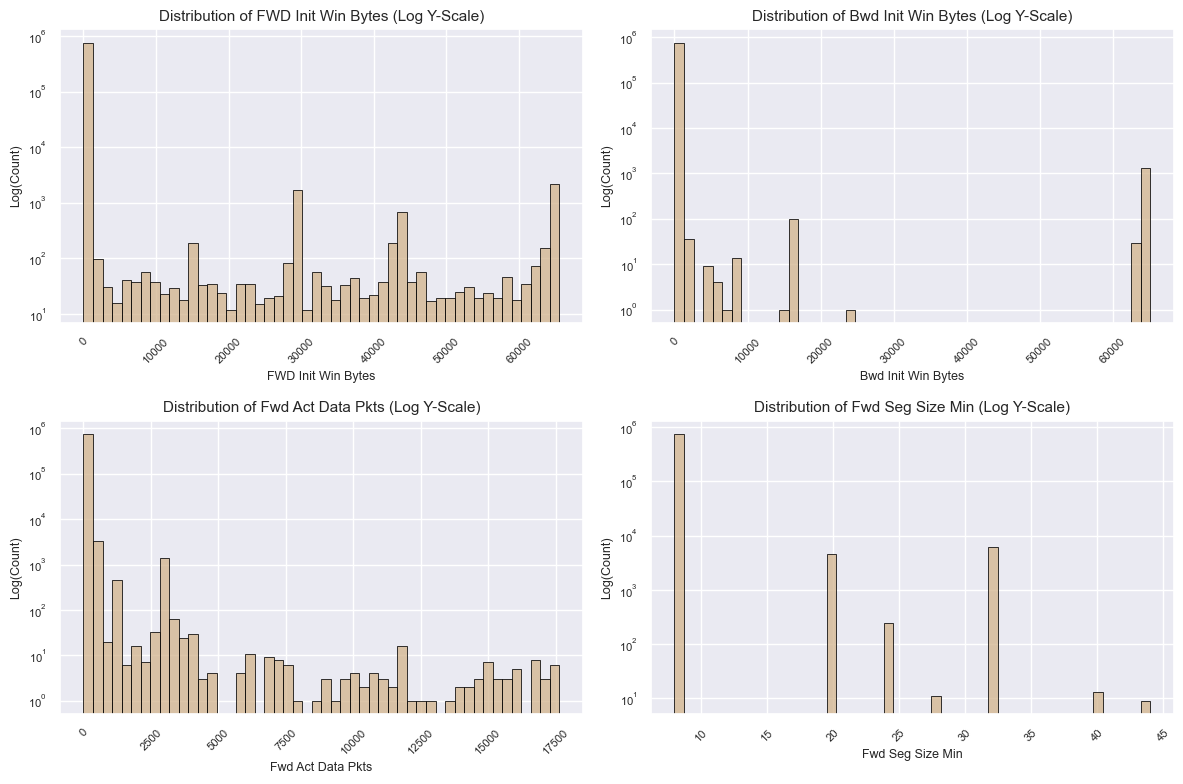

In [ ]:
TCP_Window_cols = [
    "FWD Init Win Bytes",
    "Bwd Init Win Bytes",
    "Fwd Act Data Pkts",
    "Fwd Seg Size Min"
    
    
]

# Set up plot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(TCP_Window_cols):
    ax = axes[i]
    sns.histplot(combined_df[col], ax=ax, bins=50,
                 edgecolor="black", color="tan")
    ax.set_yscale("log")  # Log scale on Y-axis
    ax.set_title(f"Distribution of {col} (Log Y-Scale)", fontsize=11)
    ax.set_xlabel(col, fontsize=9)
    ax.set_ylabel("Log(Count)", fontsize=9)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)




plt.tight_layout()
plt.show()

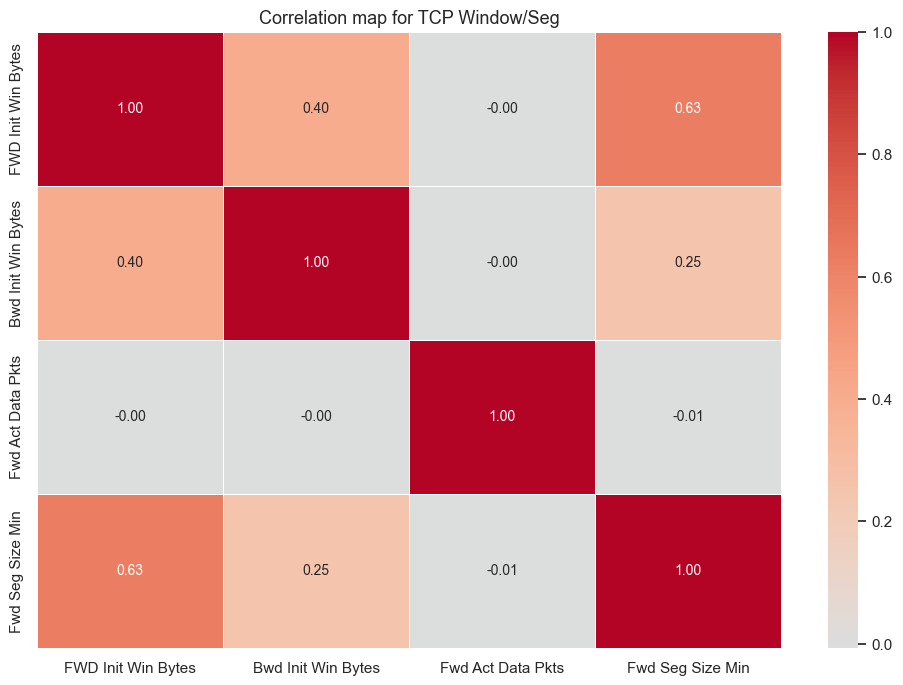

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Correlation map for TCP Window/Seg", fontsize = 13)
sns.heatmap(
    combined_df[TCP_Window_cols].corr(),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10}
)
plt.show()

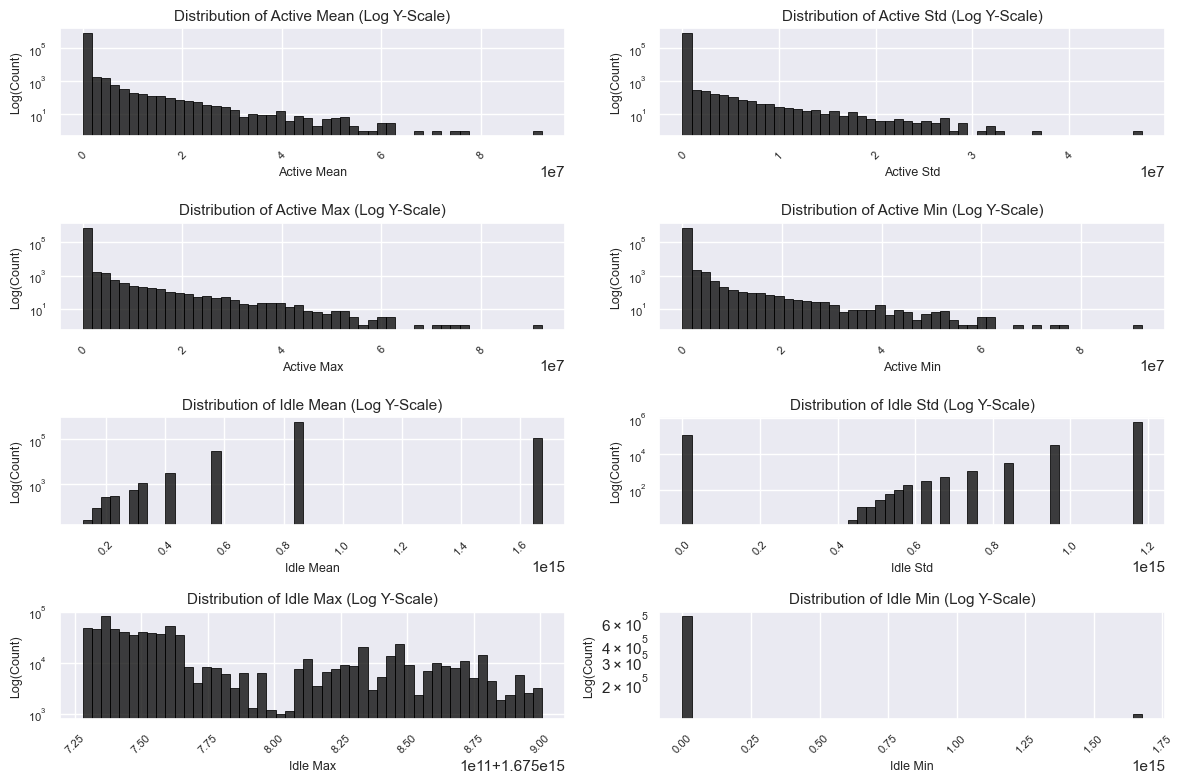

In [ ]:
Active_idle_cols = [
    "Active Mean",
    "Active Std",
    "Active Max",
    "Active Min",
    "Idle Mean",
    "Idle Std",
    "Idle Max",
    "Idle Min"
    
    
]

# Set up plot grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(Active_idle_cols):
    ax = axes[i]
    sns.histplot(combined_df[col], ax=ax, bins=50,
                 edgecolor="black", color="black")
    ax.set_yscale("log")  # Log scale on Y-axis
    ax.set_title(f"Distribution of {col} (Log Y-Scale)", fontsize=11)
    ax.set_xlabel(col, fontsize=9)
    ax.set_ylabel("Log(Count)", fontsize=9)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)




plt.tight_layout()
plt.show()

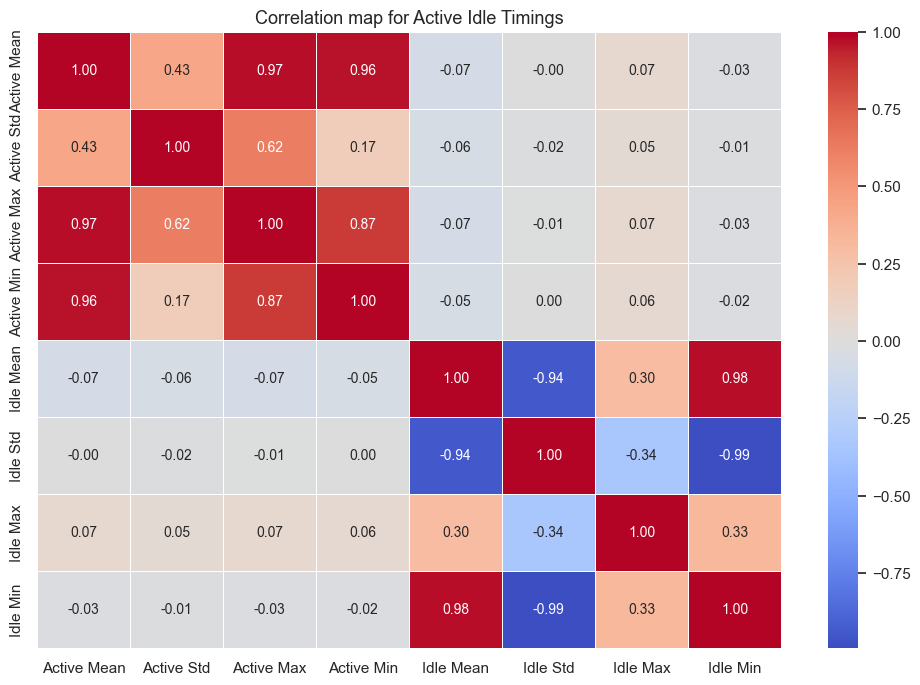

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Correlation map for Active Idle Timings", fontsize = 13)
sns.heatmap(
    combined_df[Active_idle_cols].corr(),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10}
)
plt.show()

---


# I have one last group witch is identifiers 
* the list consists of 
Flow ID
Src IP
Dst IP
Src Port
Dst Port
Protocol 
Timestamp 
location (made with Geotag)
label

- These will be one hot encoded but for now i will leave as is and use logic when considering to drop or keep these columns 